In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils

%load_ext autoreload
%autoreload 2

sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("data/train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
descriptions = pd.read_csv("data/data_desciption_simple.txt", delimiter=': ')
descriptions.columns = ['Column', 'Description']

/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/1705111813.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  descriptions = pd.read_csv("data/data_desciption_simple.txt", delimiter=': ')


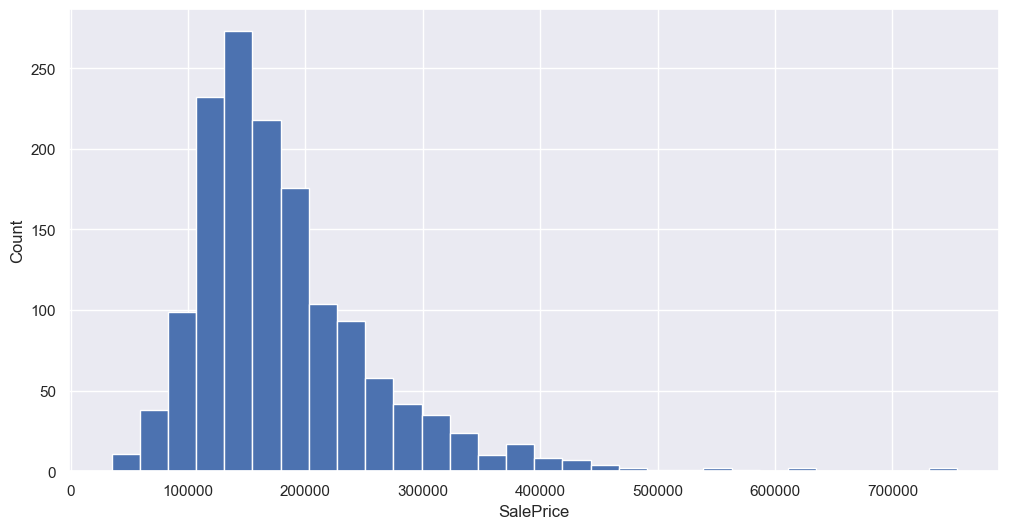

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(df['SalePrice'], bins=30)
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

In [65]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3174698912.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_corr = df.corr()['SalePrice'].drop(['SalePrice'])


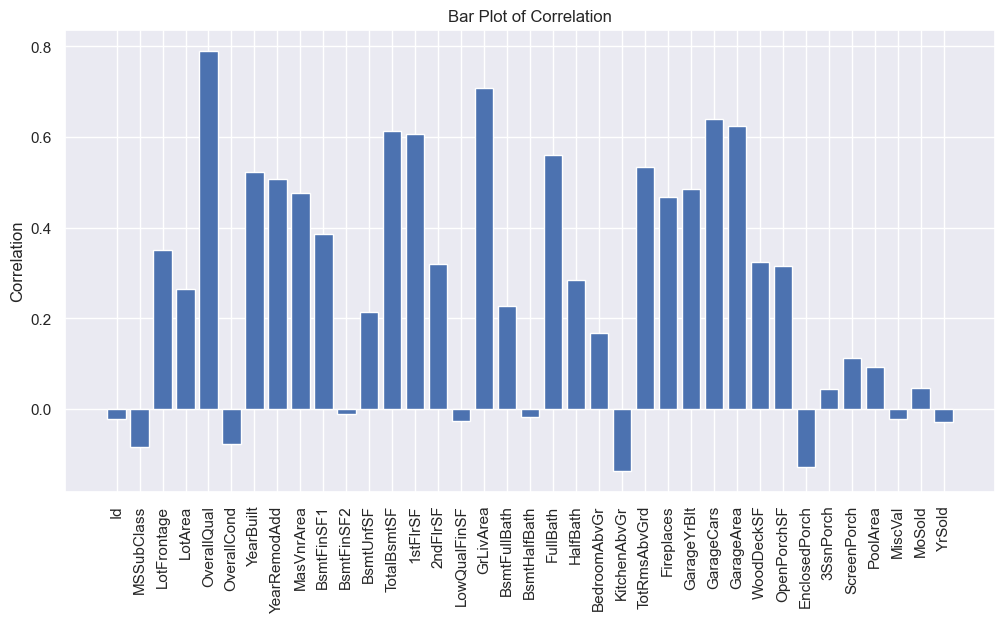

In [28]:
price_corr = df.corr()['SalePrice'].drop(['SalePrice'])

utils.plot_bars(price_corr.index, price_corr, "Correlation")

In [74]:
np.arange(0, 10, 10 // 2)

array([0, 5])

In [75]:
np.random.random(size=5)

array([0.85243893, 0.23641851, 0.10965117, 0.4907191 , 0.26920435])

/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/2628126857.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_df = df.sort_values(by=['YearBuilt']).groupby(['YearBuilt']).mean().reset_index()


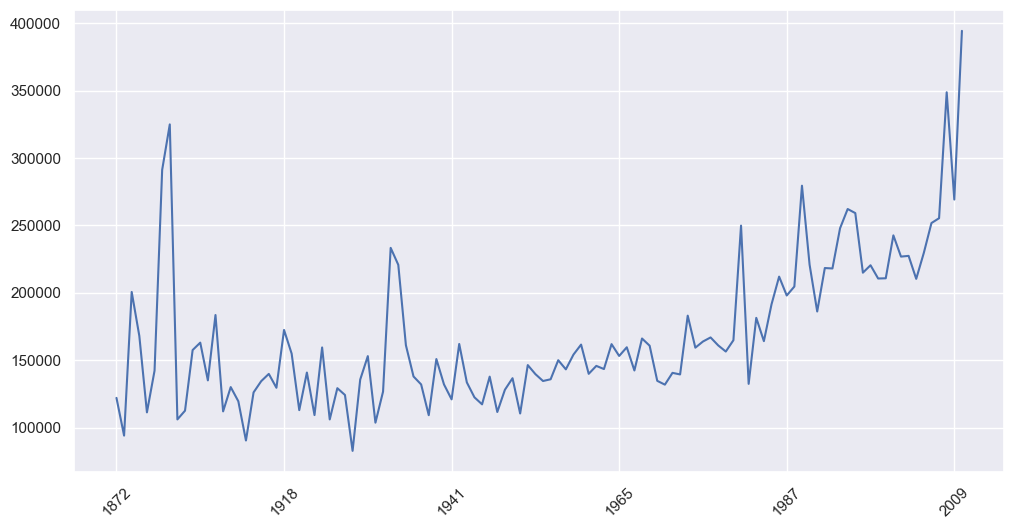

In [81]:
plt.figure(figsize=(12, 6))

year_df = df.sort_values(by=['YearBuilt']).groupby(['YearBuilt']).mean().reset_index()

plt.plot(np.arange(len(year_df)), year_df['SalePrice'])

ticks = np.arange(0, len(year_df), len(year_df) // 5)
labels = year_df['YearBuilt'].iloc[ticks]

plt.xticks(ticks=ticks, labels=labels, rotation=45)
plt.show()

/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/2820315143.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_df = df.sort_values(by=['YearBuilt']).groupby(['YearBuilt']).mean().reset_index()


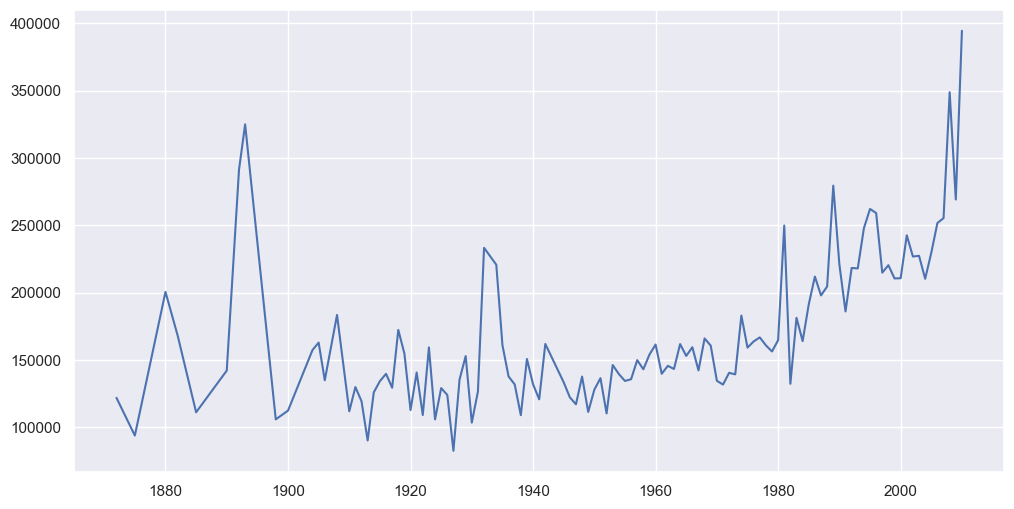

In [83]:
plt.figure(figsize=(12, 6))

year_df = df.sort_values(by=['YearBuilt']).groupby(['YearBuilt']).mean().reset_index()

plt.plot(year_df['YearBuilt'], year_df['SalePrice'])

ticks = np.arange(0, len(year_df), len(year_df) // 5)
labels = year_df['YearBuilt'].iloc[ticks]

# plt.xticks(ticks=ticks, labels=labels, rotation=45)
plt.show()

In [14]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [48]:
cat_cols = pd.Index(list(set(df.columns) - set(price_corr.index) - set(['SalePrice'])))

cat_cols

Index(['BsmtFinType1', 'HeatingQC', 'LandSlope', 'BldgType', 'LandContour',
       'Neighborhood', 'PoolQC', 'GarageType', 'PavedDrive', 'BsmtExposure',
       'ExterQual', 'ExterCond', 'BsmtFinType2', 'Electrical', 'MasVnrType',
       'Alley', 'Condition2', 'LotConfig', 'FireplaceQu', 'Exterior2nd',
       'RoofStyle', 'BsmtCond', 'SaleType', 'Heating', 'Utilities',
       'Foundation', 'MiscFeature', 'Condition1', 'RoofMatl', 'SaleCondition',
       'Functional', 'GarageQual', 'Street', 'CentralAir', 'MSZoning',
       'GarageCond', 'GarageFinish', 'BsmtQual', 'LotShape', 'HouseStyle',
       'Fence', 'Exterior1st', 'KitchenQual'],
      dtype='object')

Processing BsmtFinType1: Rating of basement finished area


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


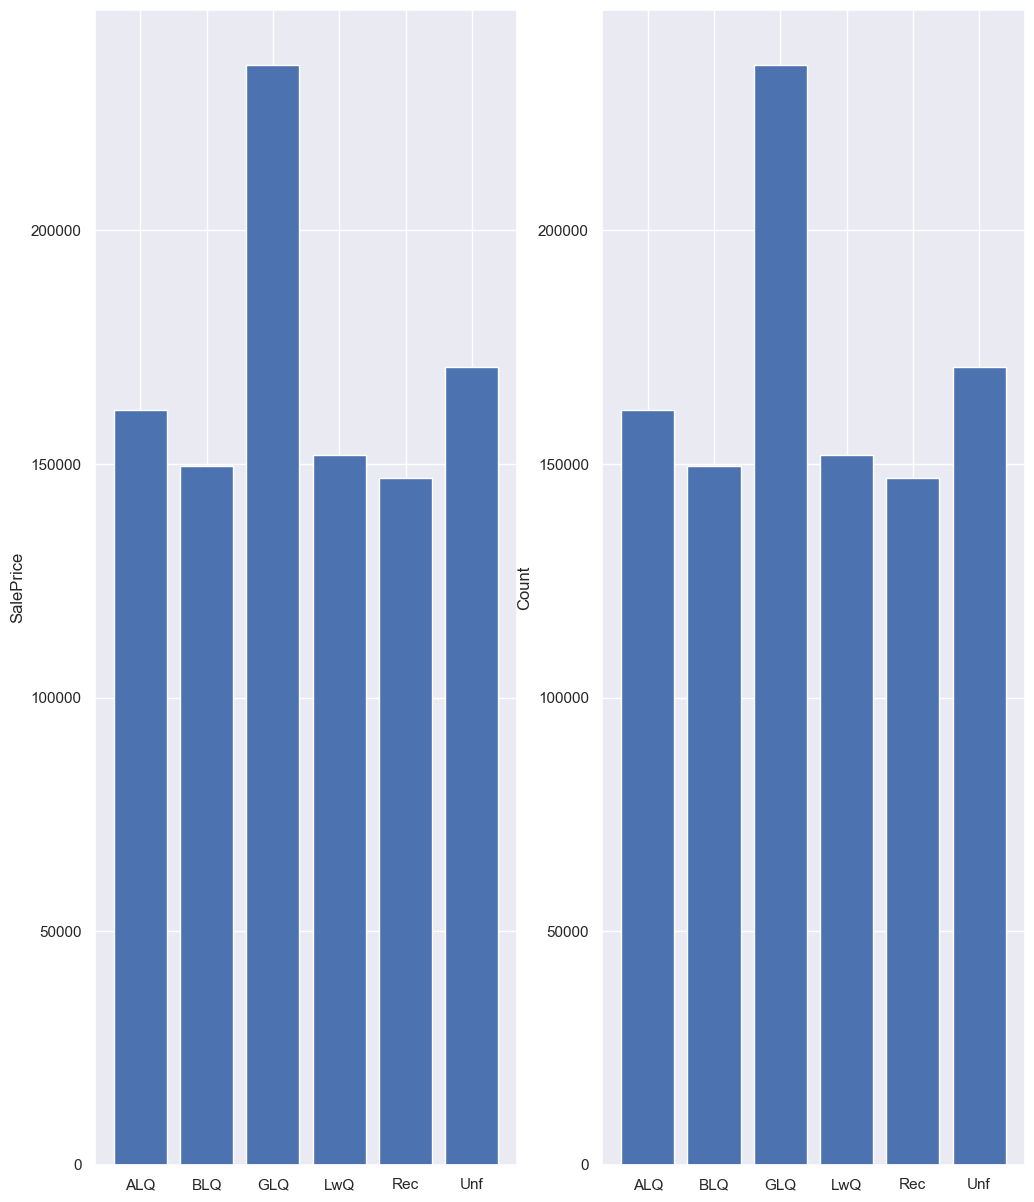

Processing HeatingQC: Heating quality and condition


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


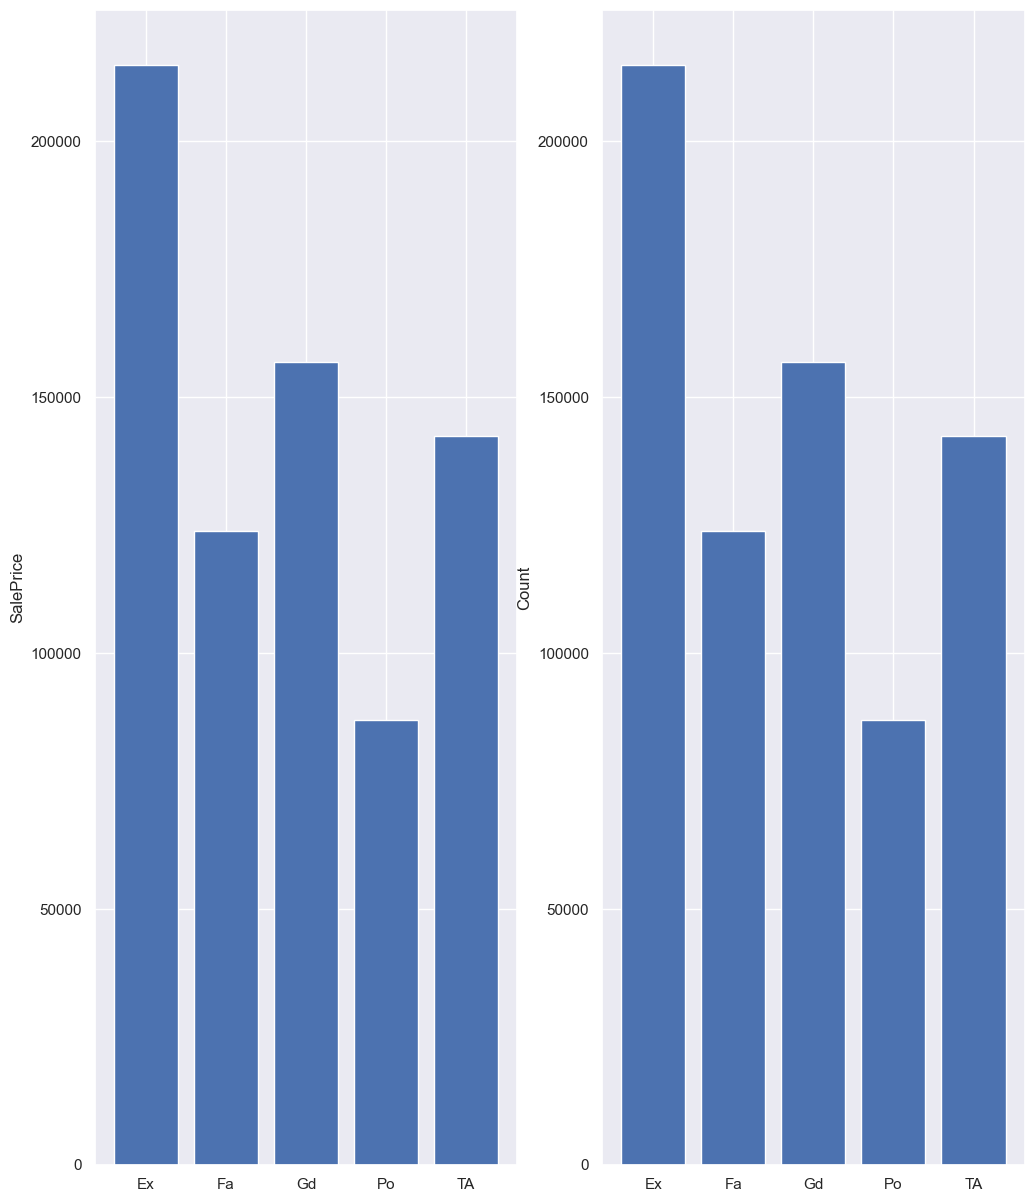

Processing LandSlope: Slope of property


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


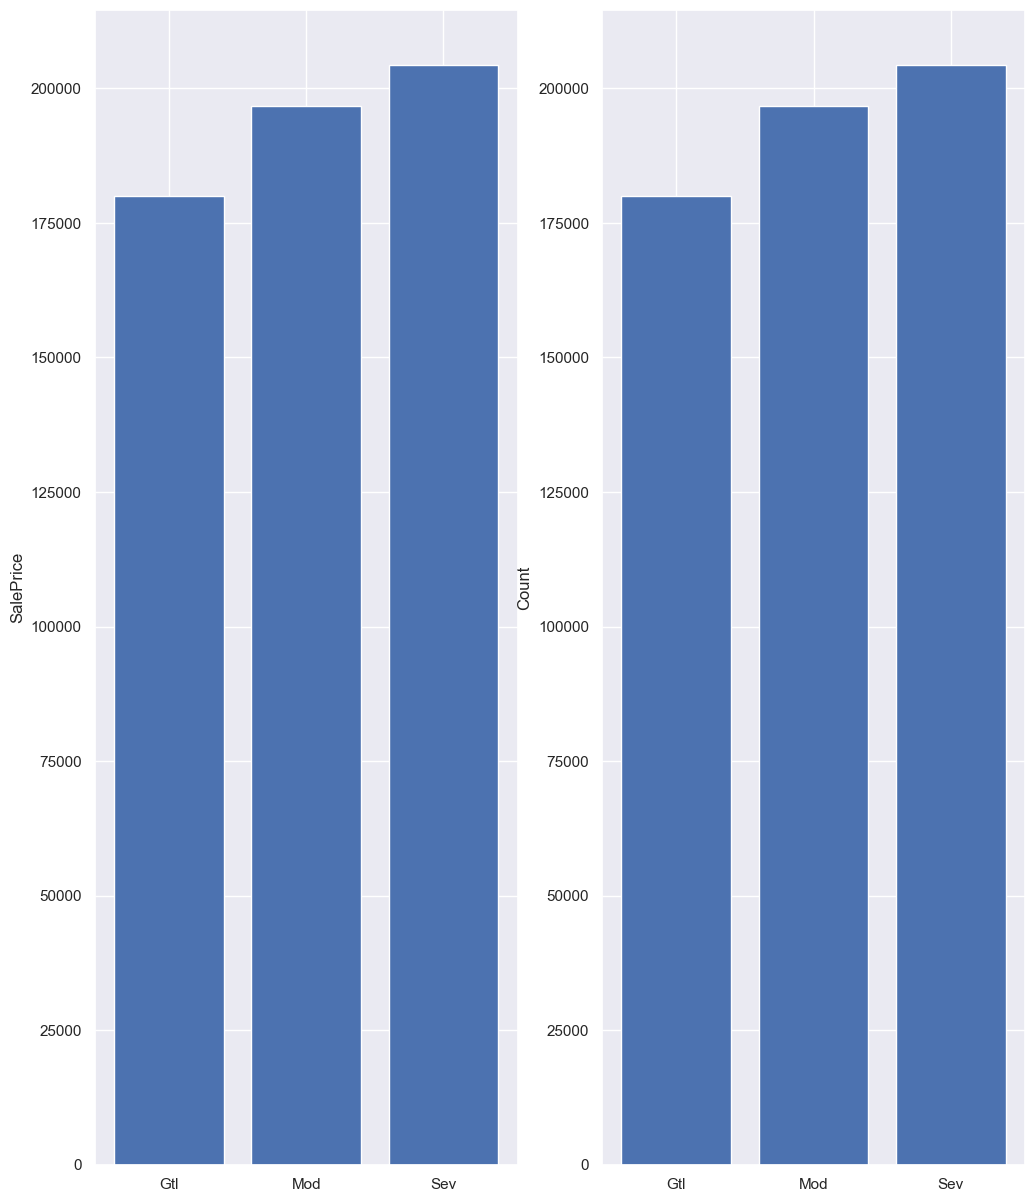

Processing BldgType: Type of dwelling


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


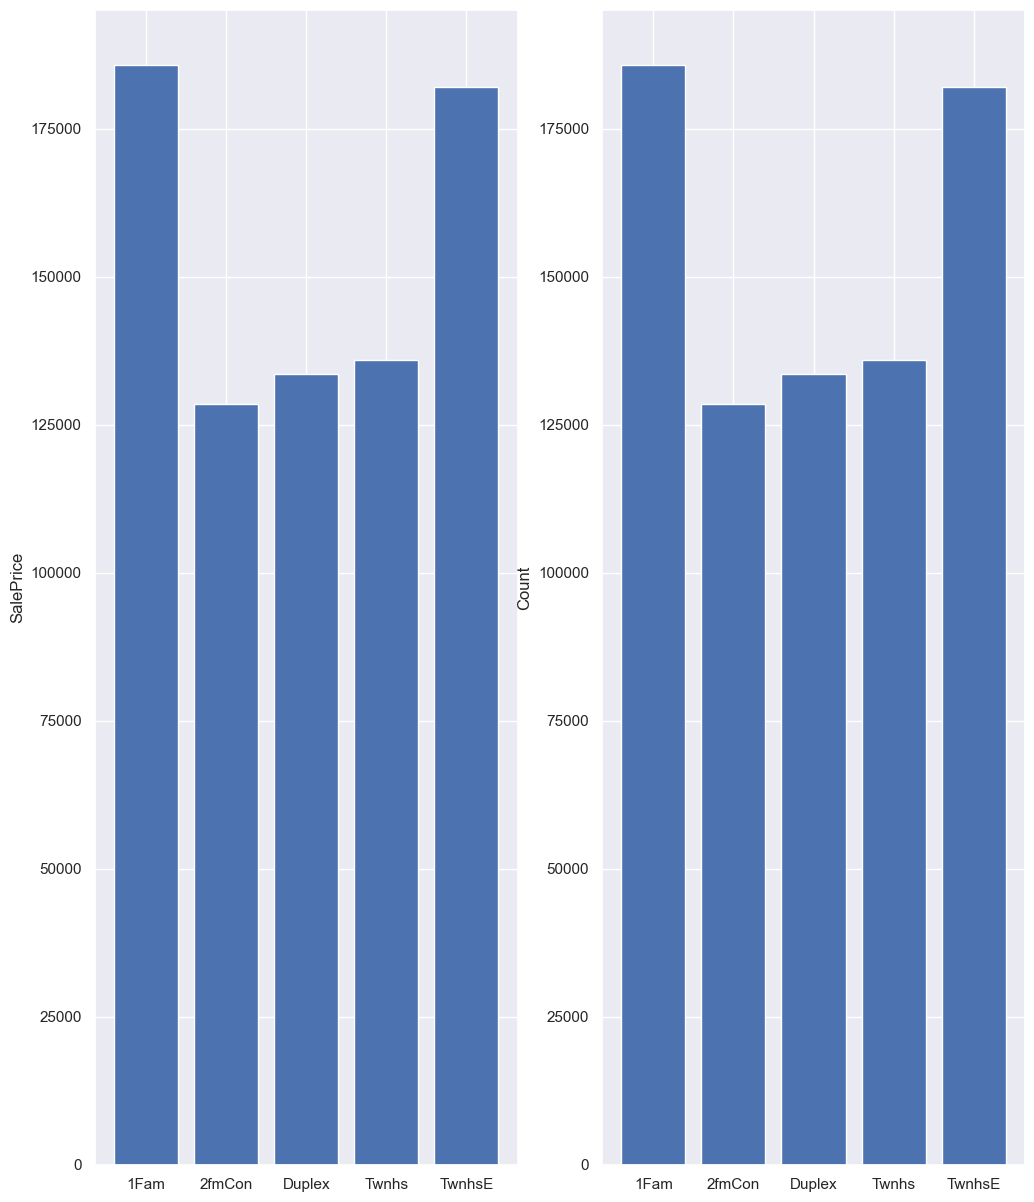

Processing LandContour: Flatness of the property


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


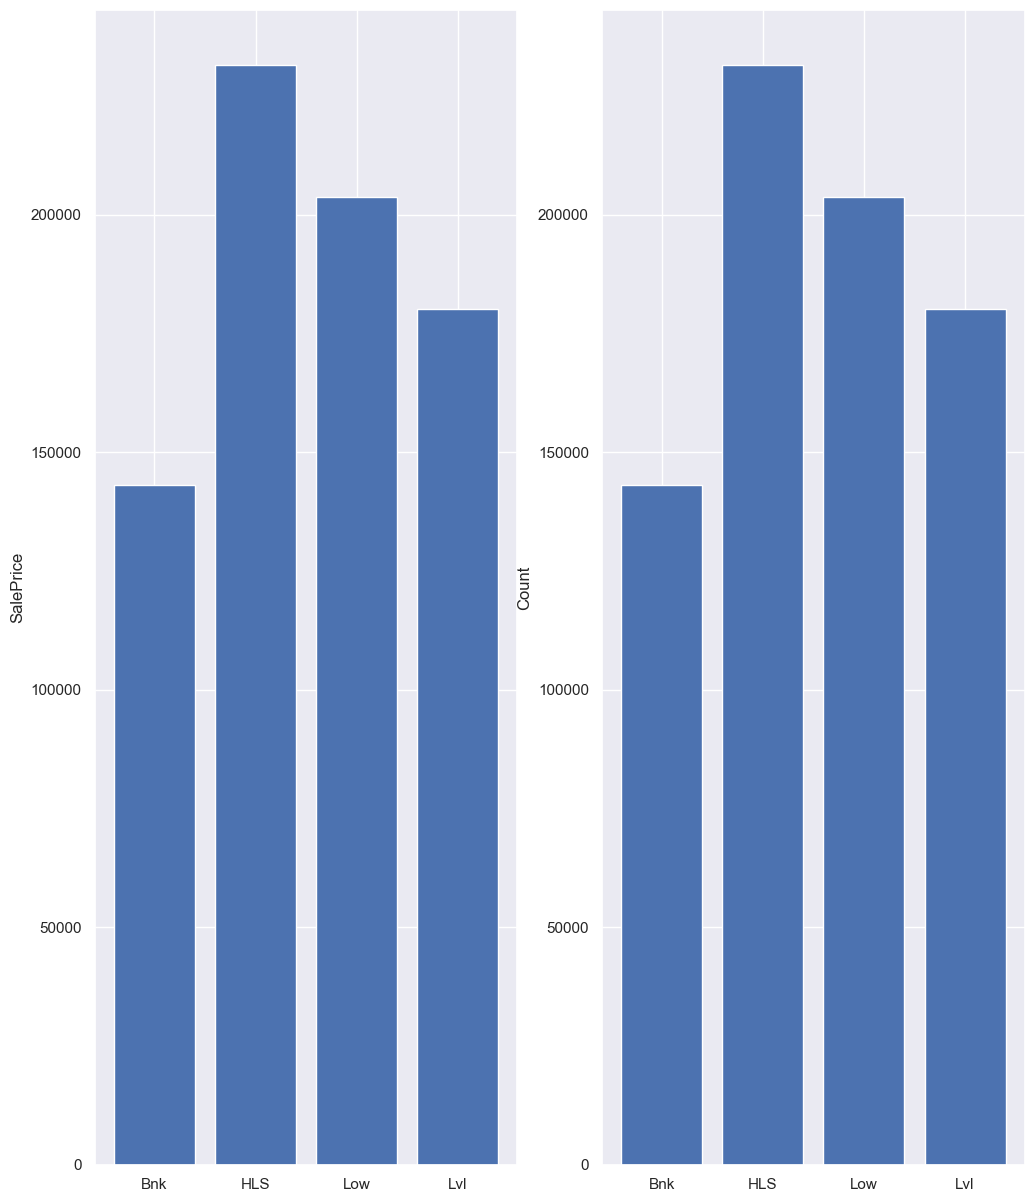

Processing Neighborhood: Physical locations within Ames city limits


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


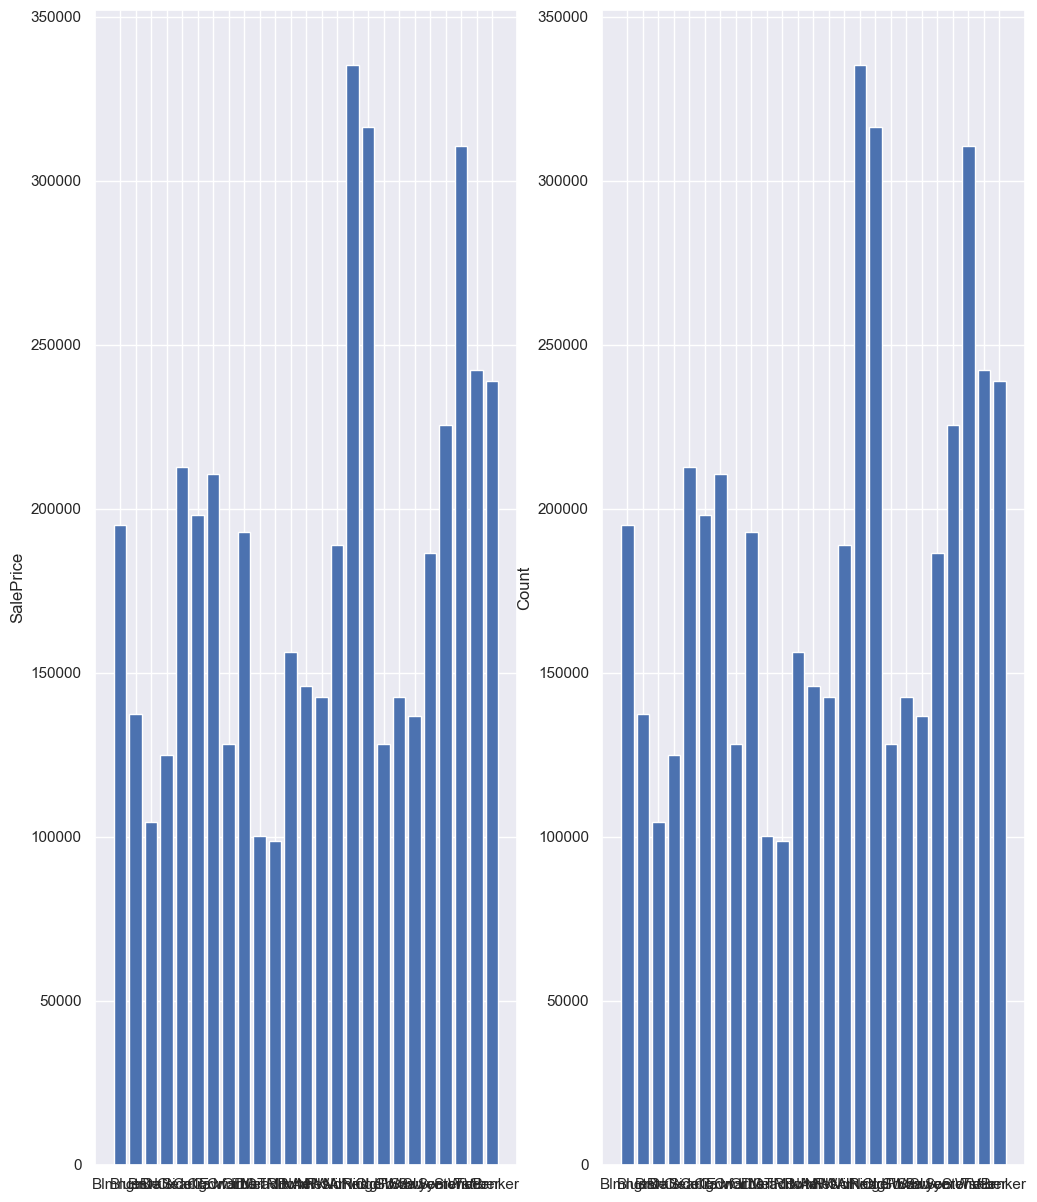

Processing PoolQC: Pool quality


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


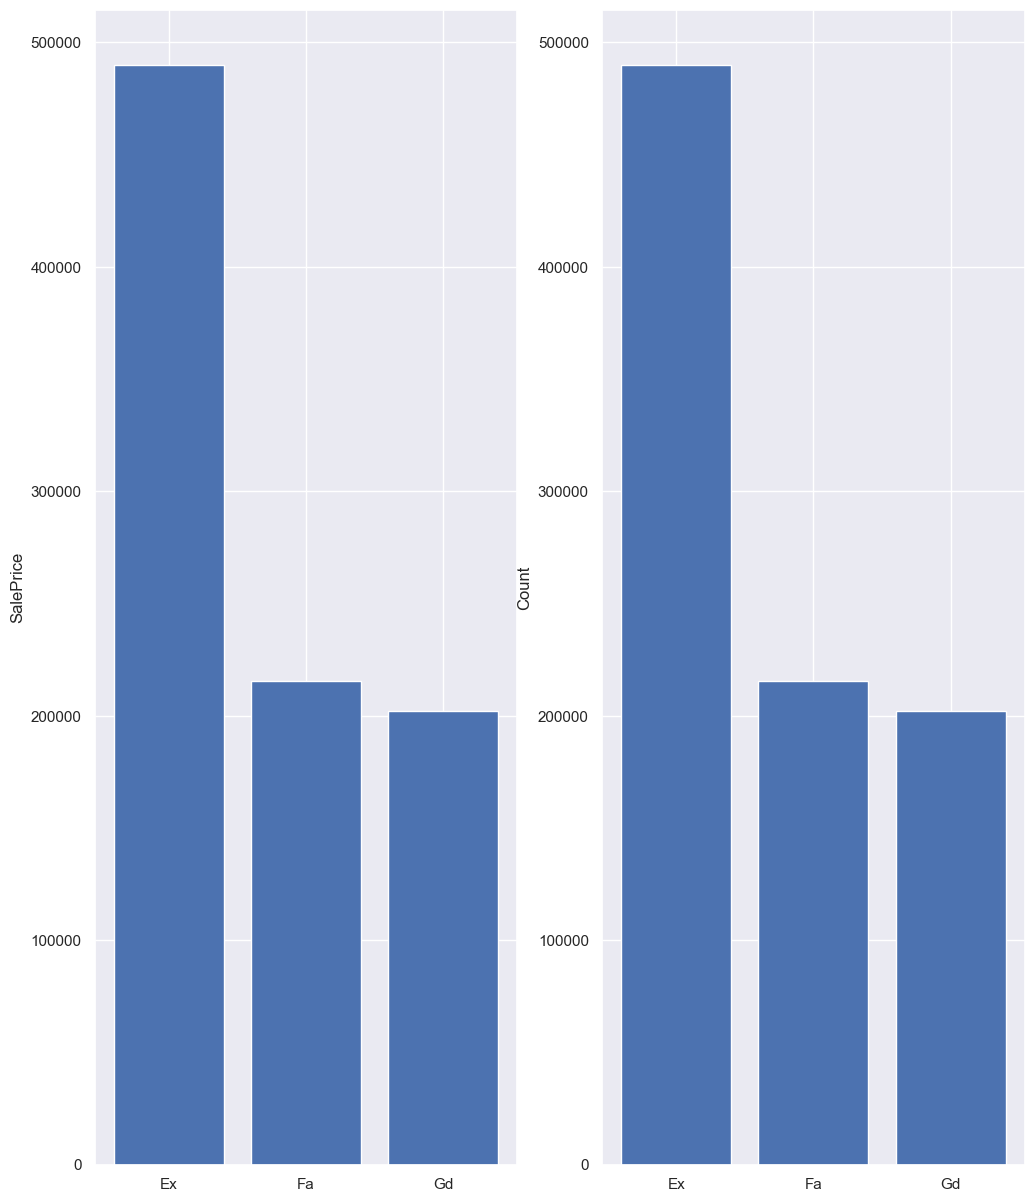

Processing GarageType: Garage location


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


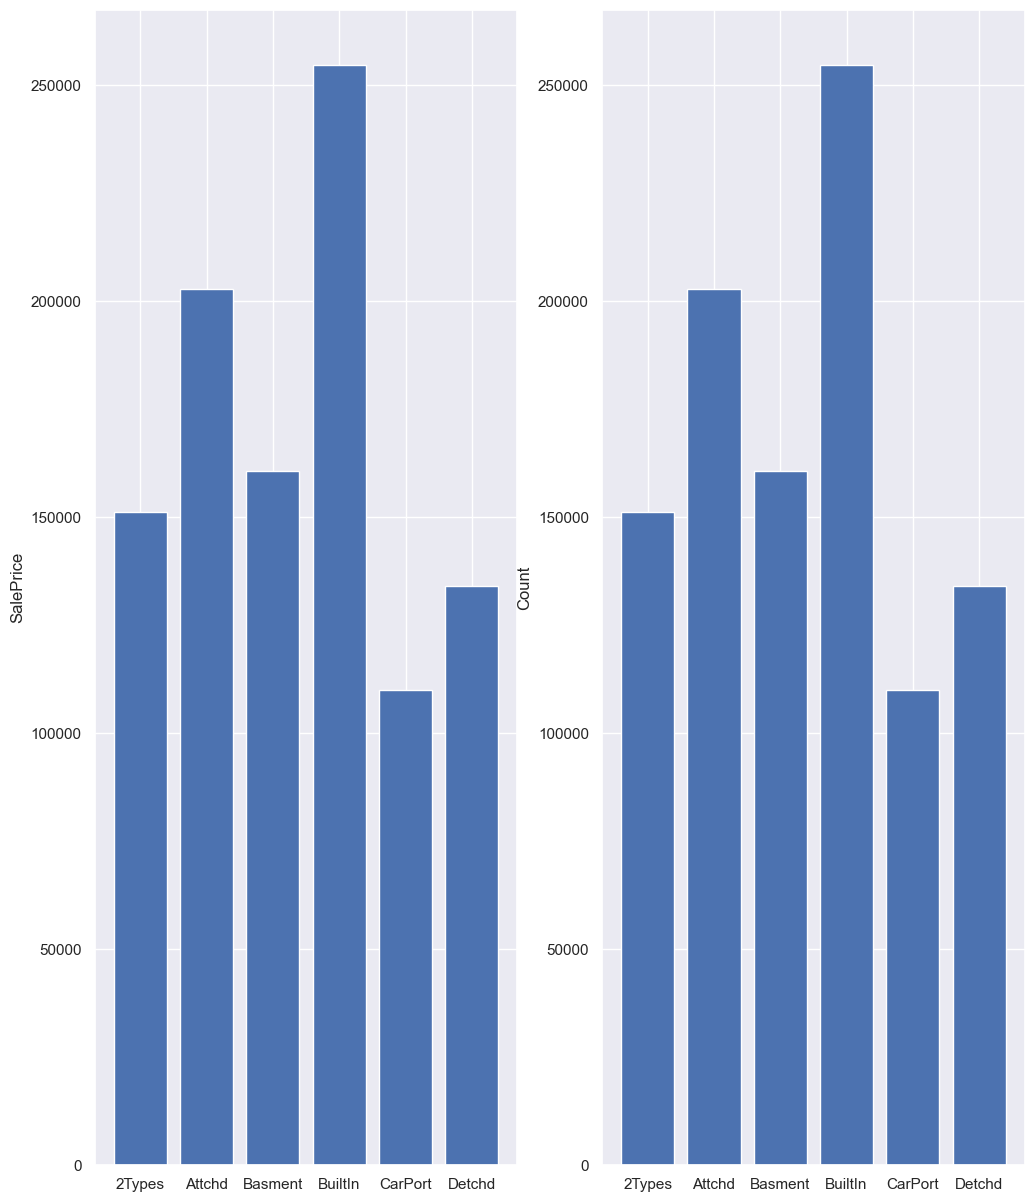

Processing PavedDrive: Paved driveway


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


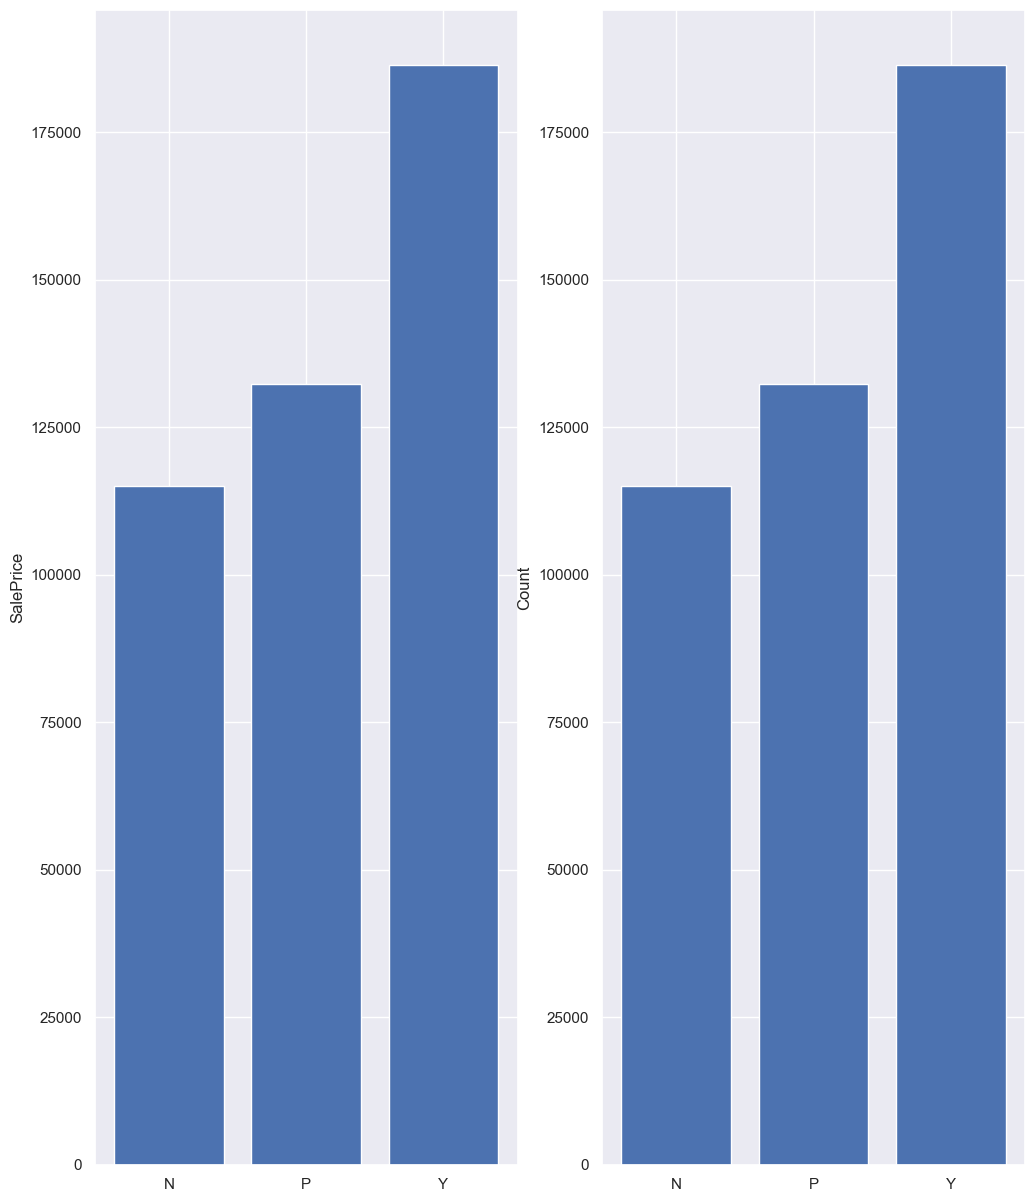

Processing BsmtExposure: Refers to walkout or garden level walls


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


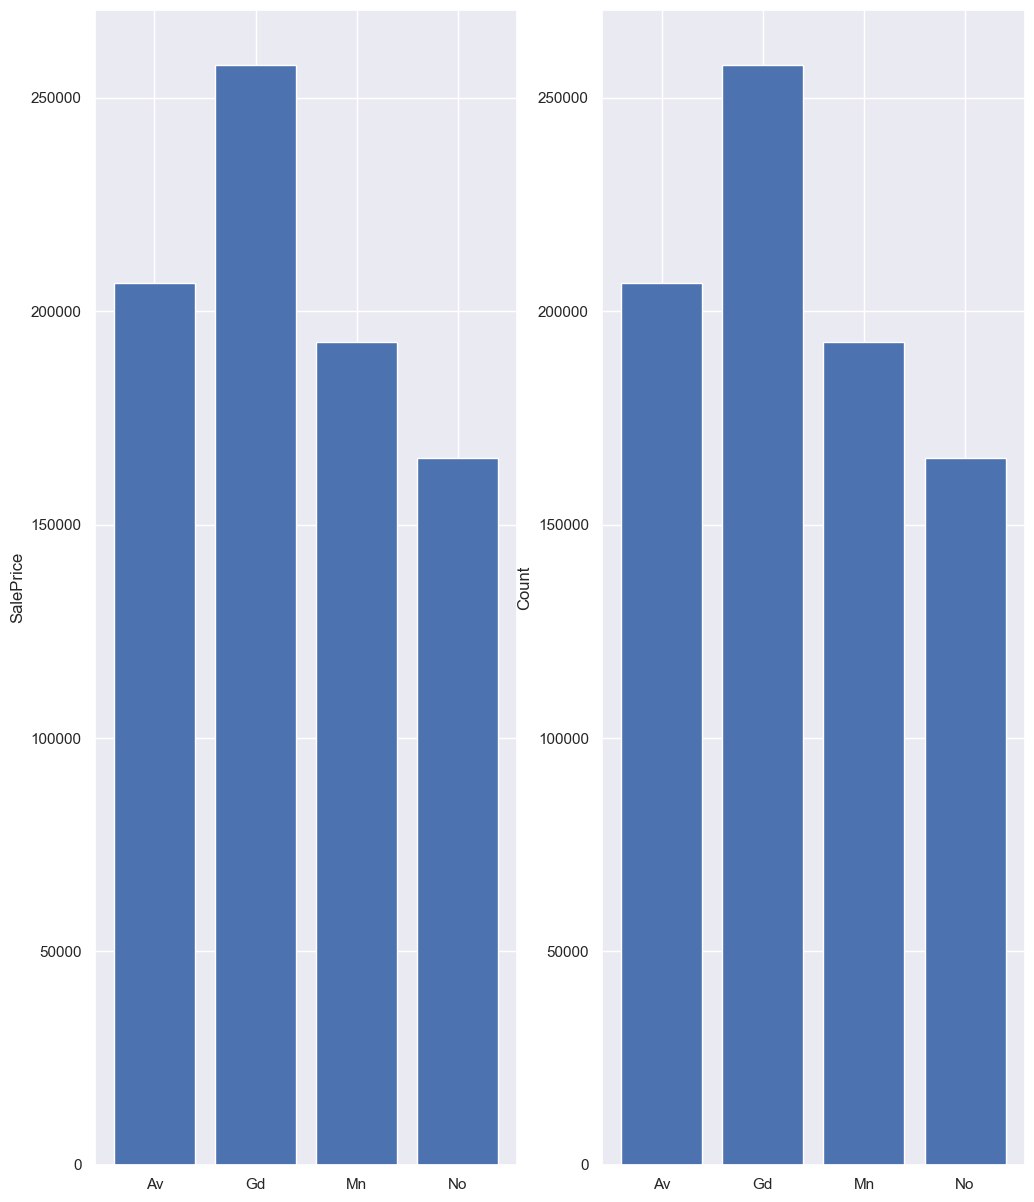

Processing ExterQual: Evaluates the quality of the material on the exterior


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


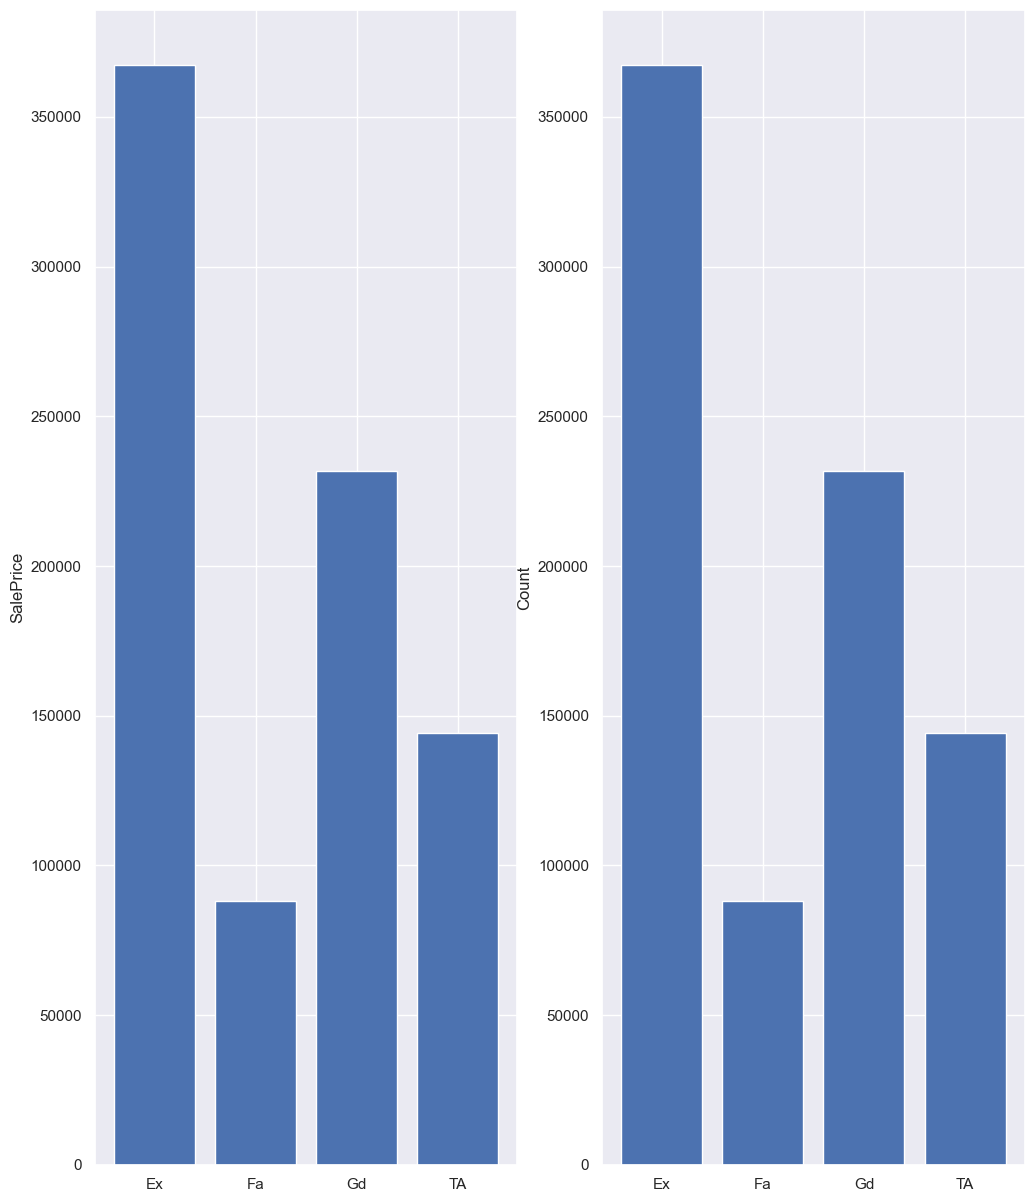

Processing ExterCond: Evaluates the present condition of the material on the exterior


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


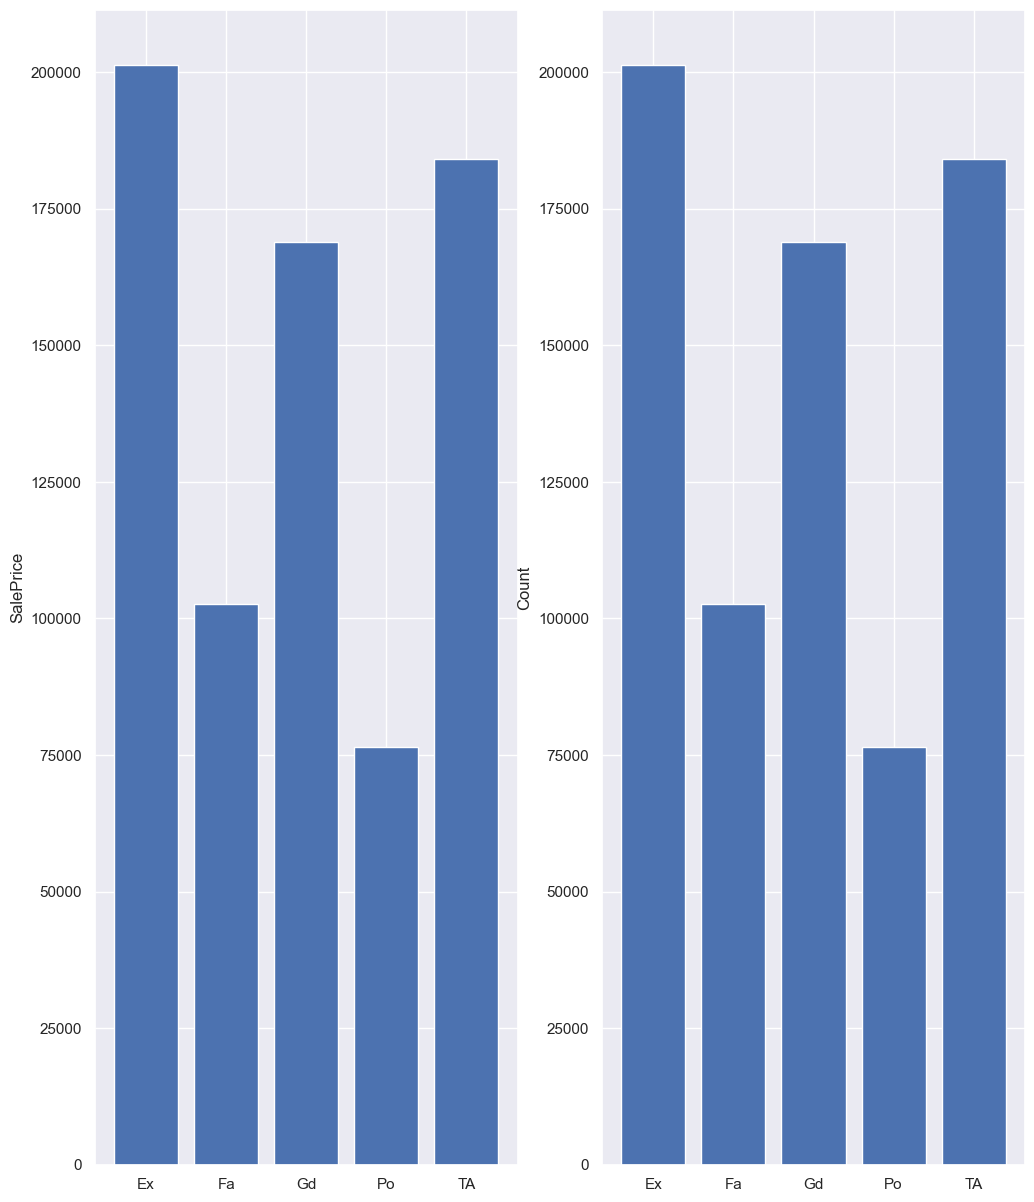

Processing BsmtFinType2: Rating of basement finished area (if multiple types)


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


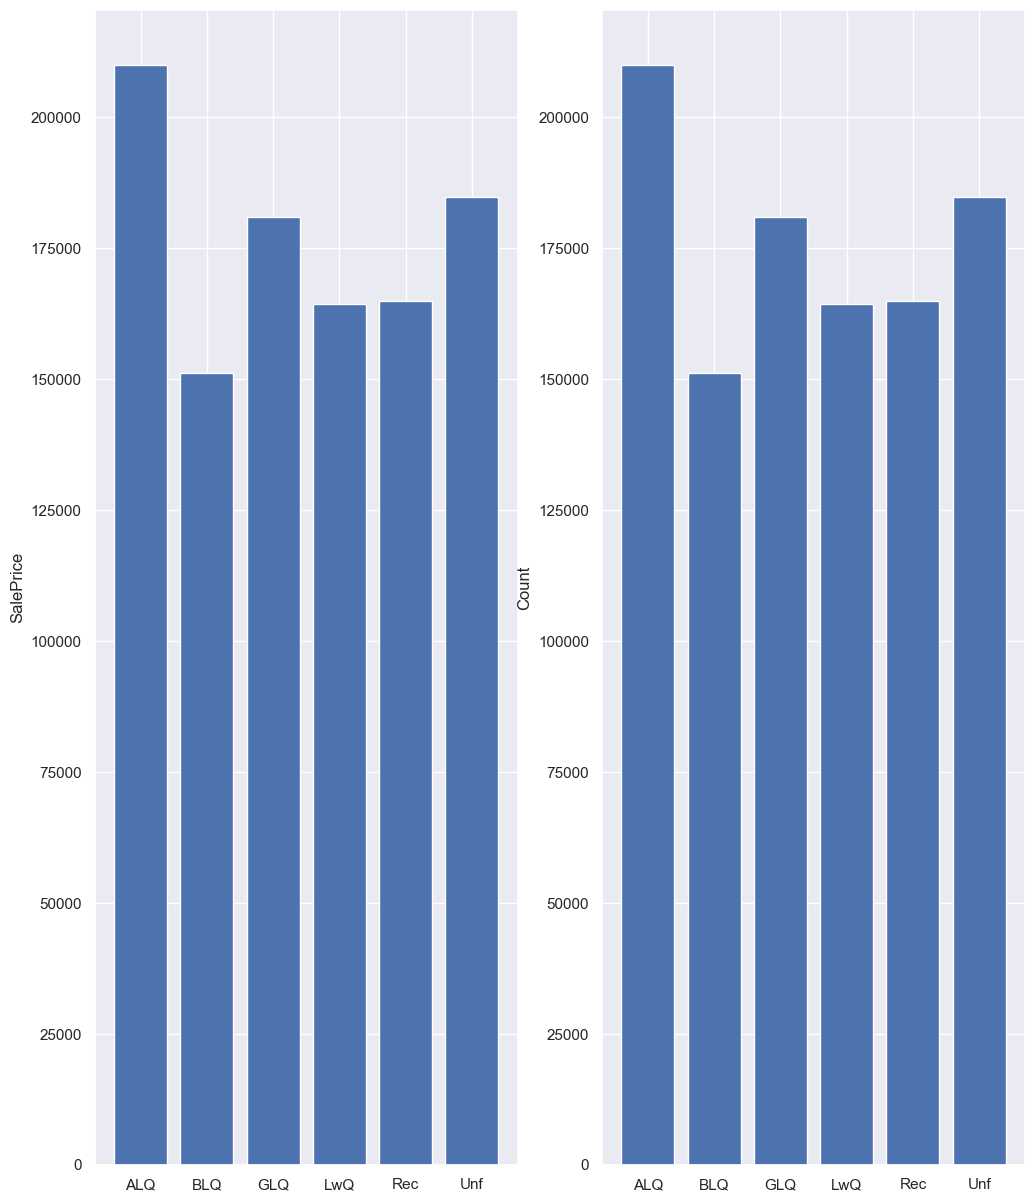

Processing Electrical: Electrical system


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


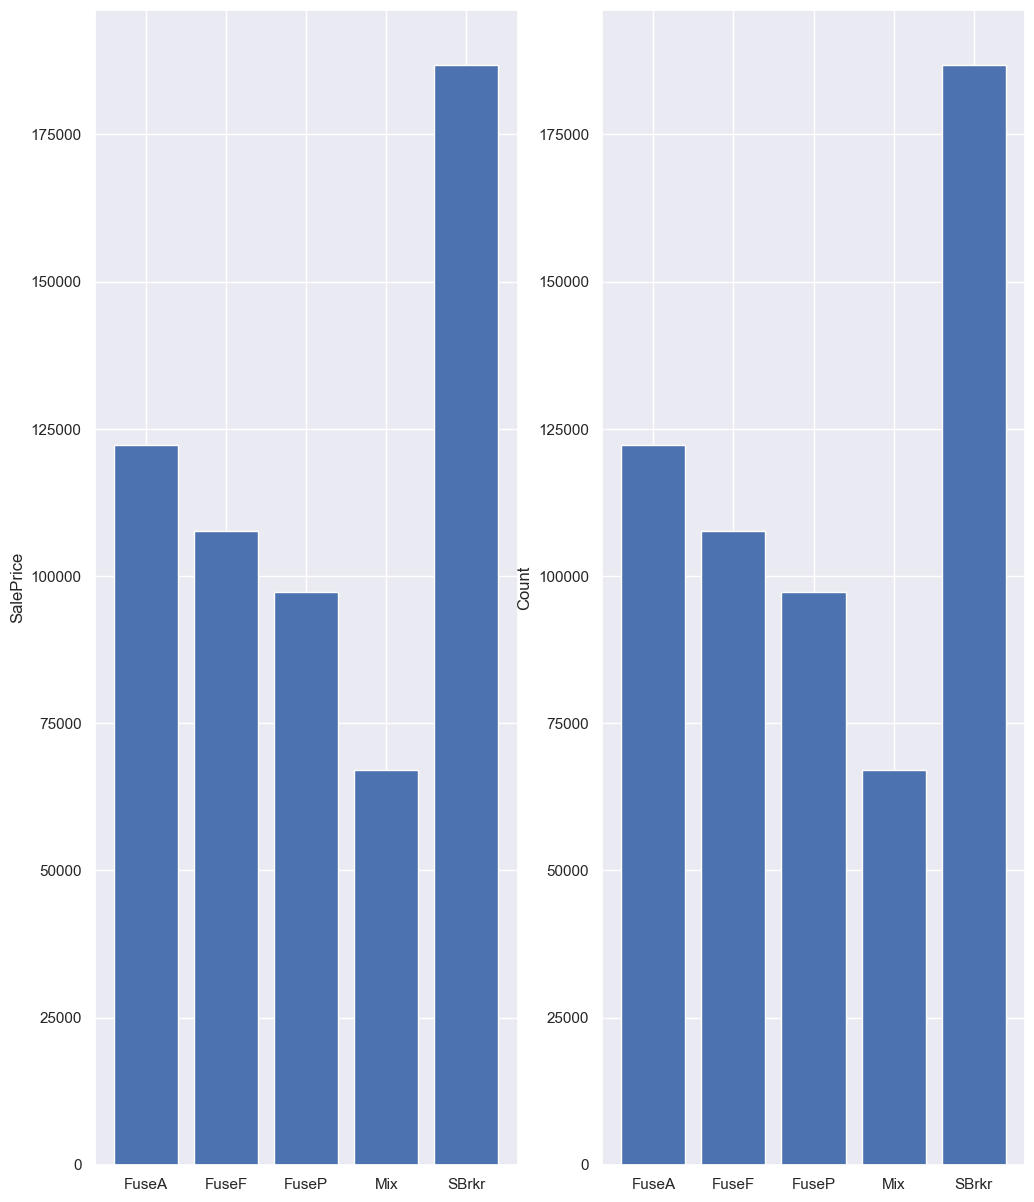

Processing MasVnrType: Masonry veneer type


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


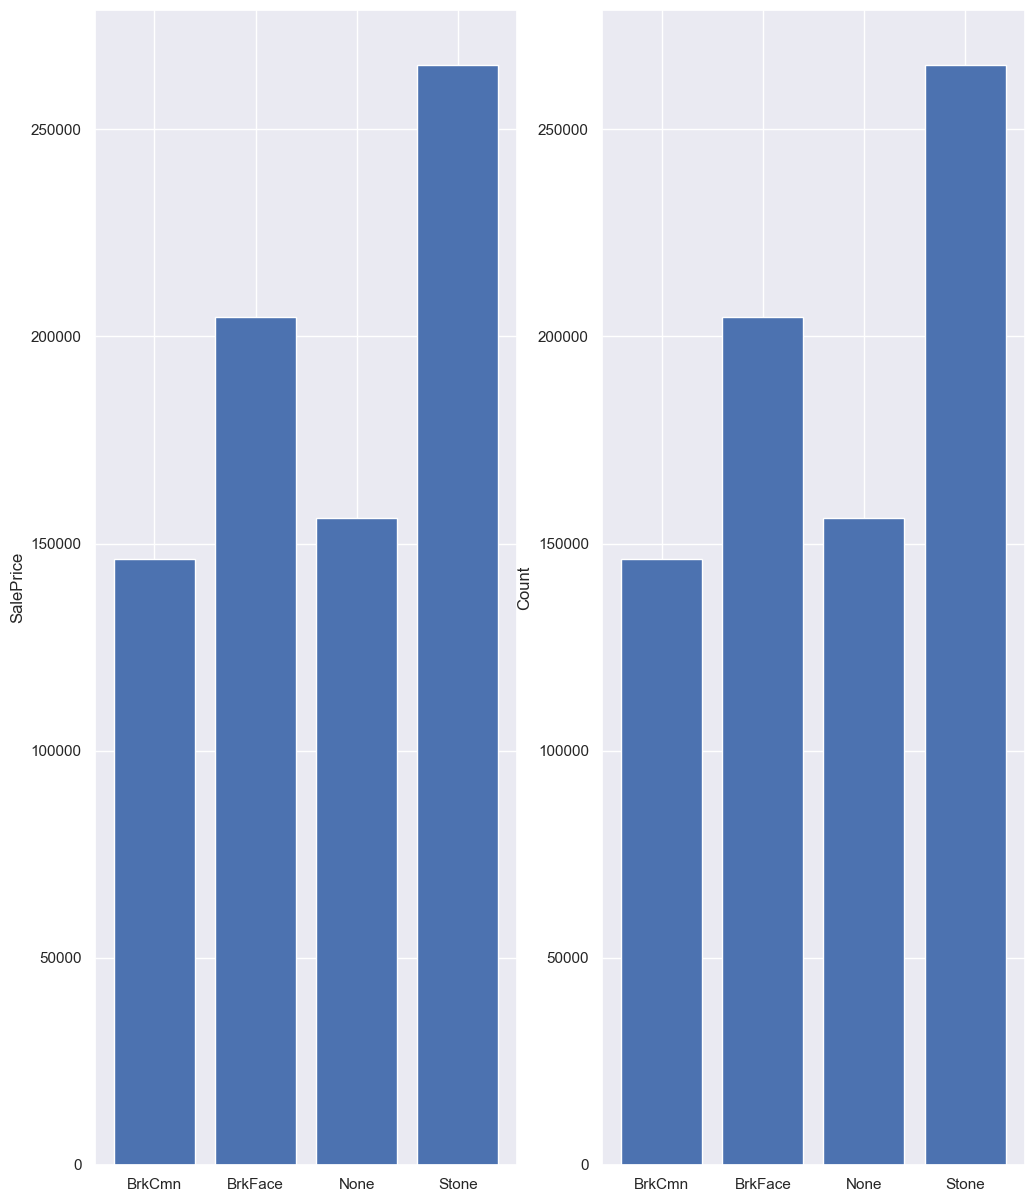

Processing Alley: Type of alley access to property


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


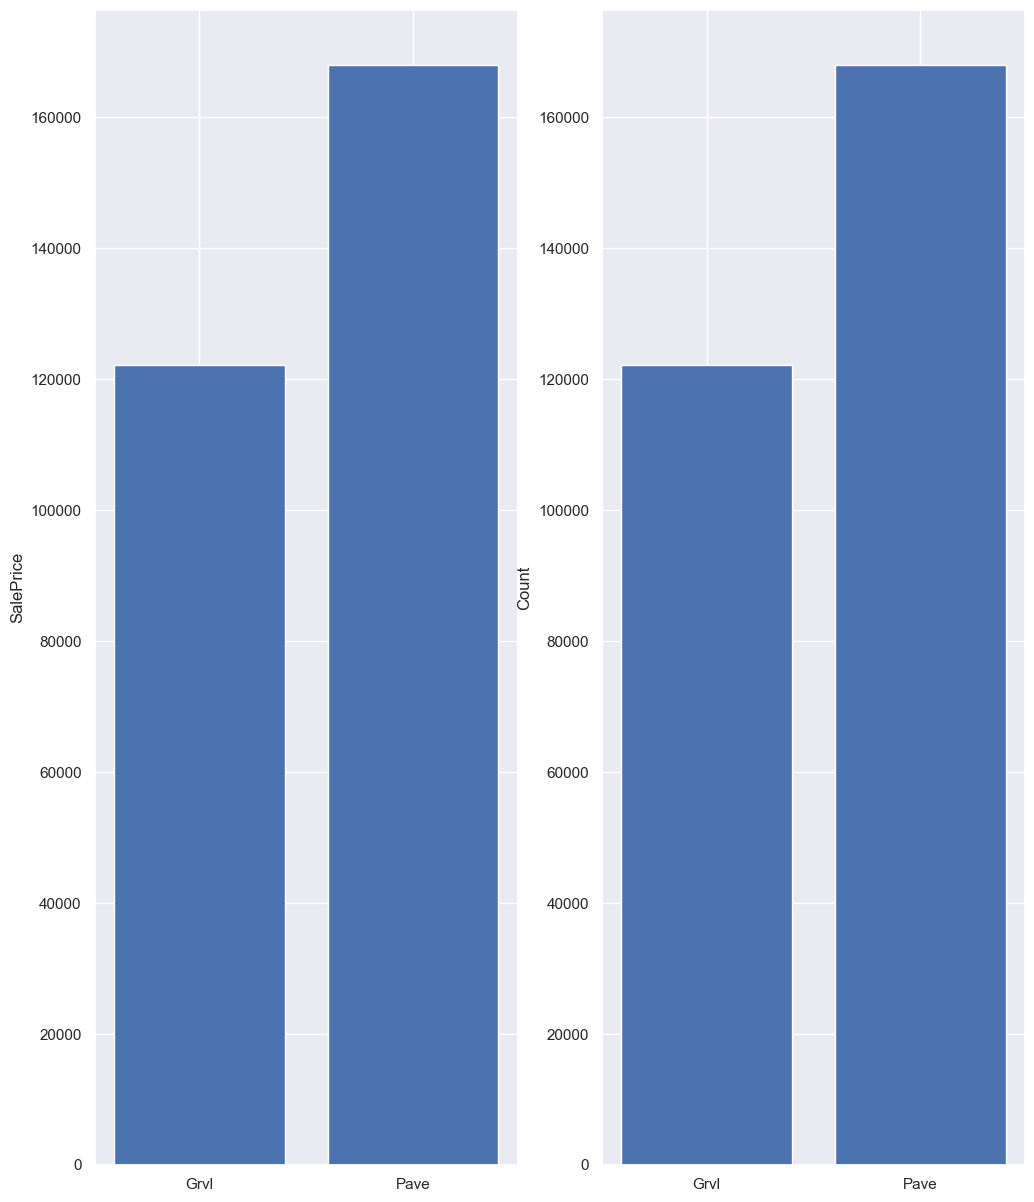

Processing Condition2: Proximity to various conditions (if more than one is present)


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


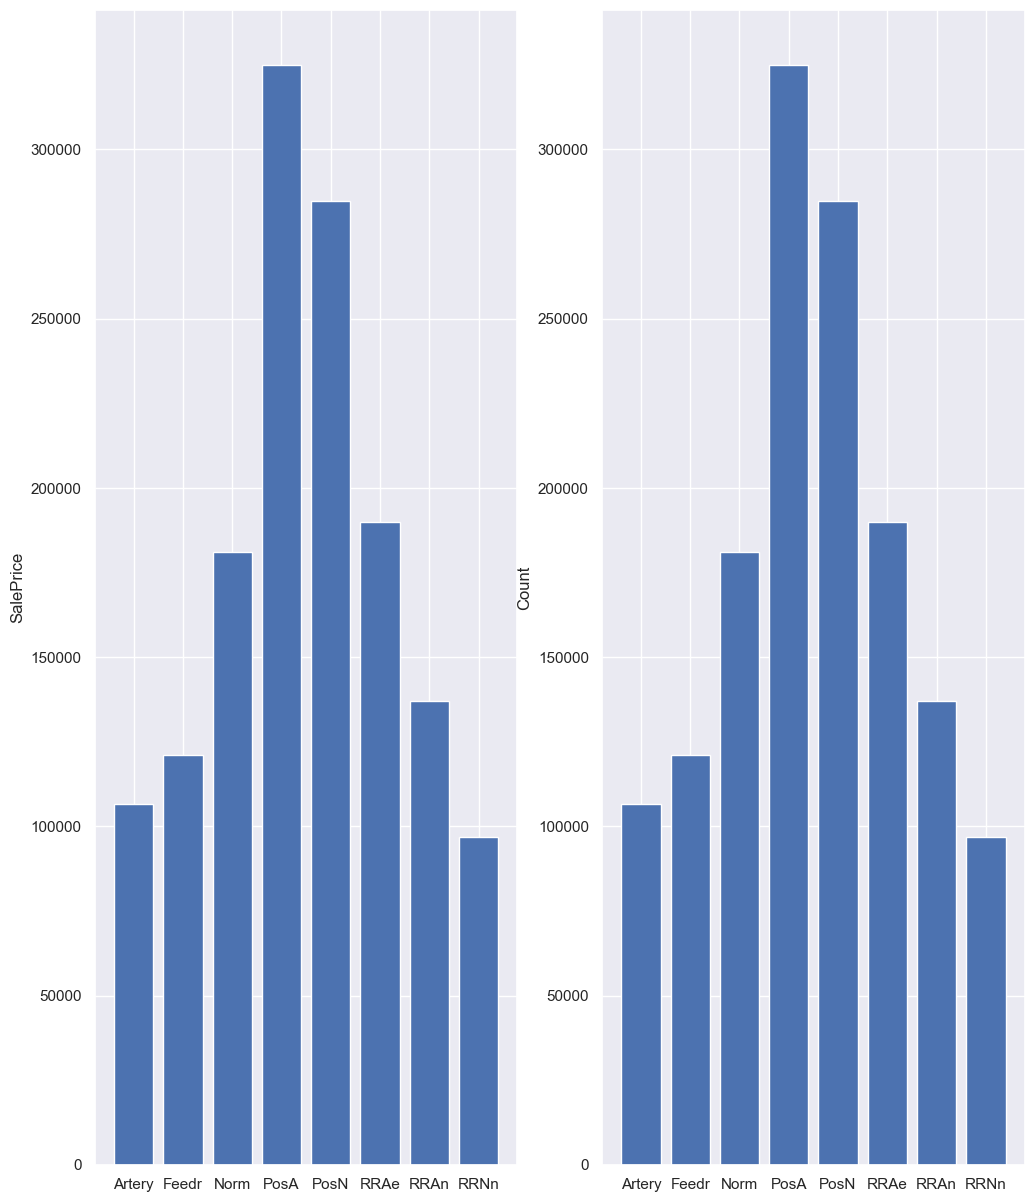

Processing LotConfig: Lot configuration


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


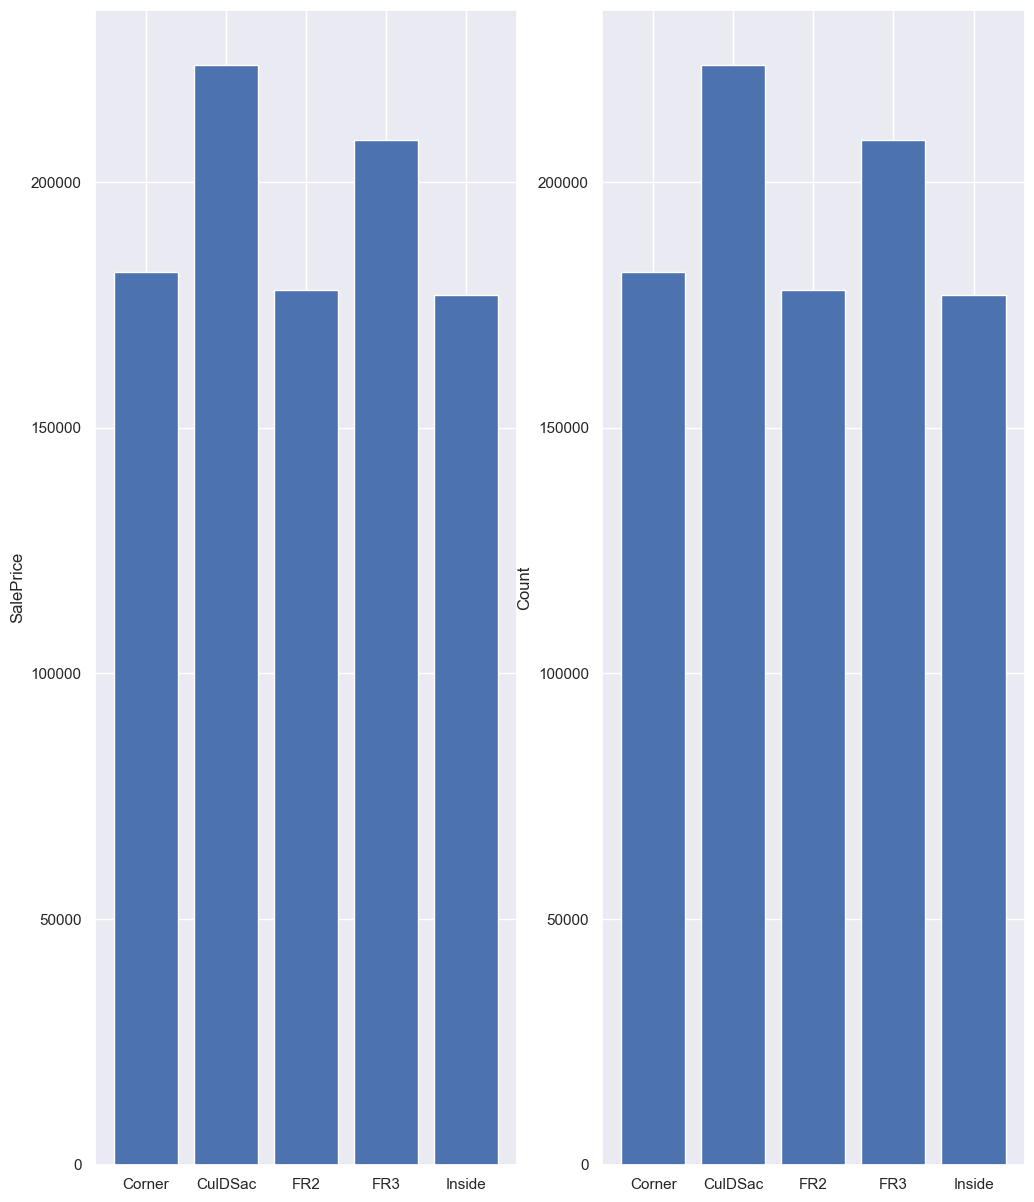

Processing FireplaceQu: Fireplace quality


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


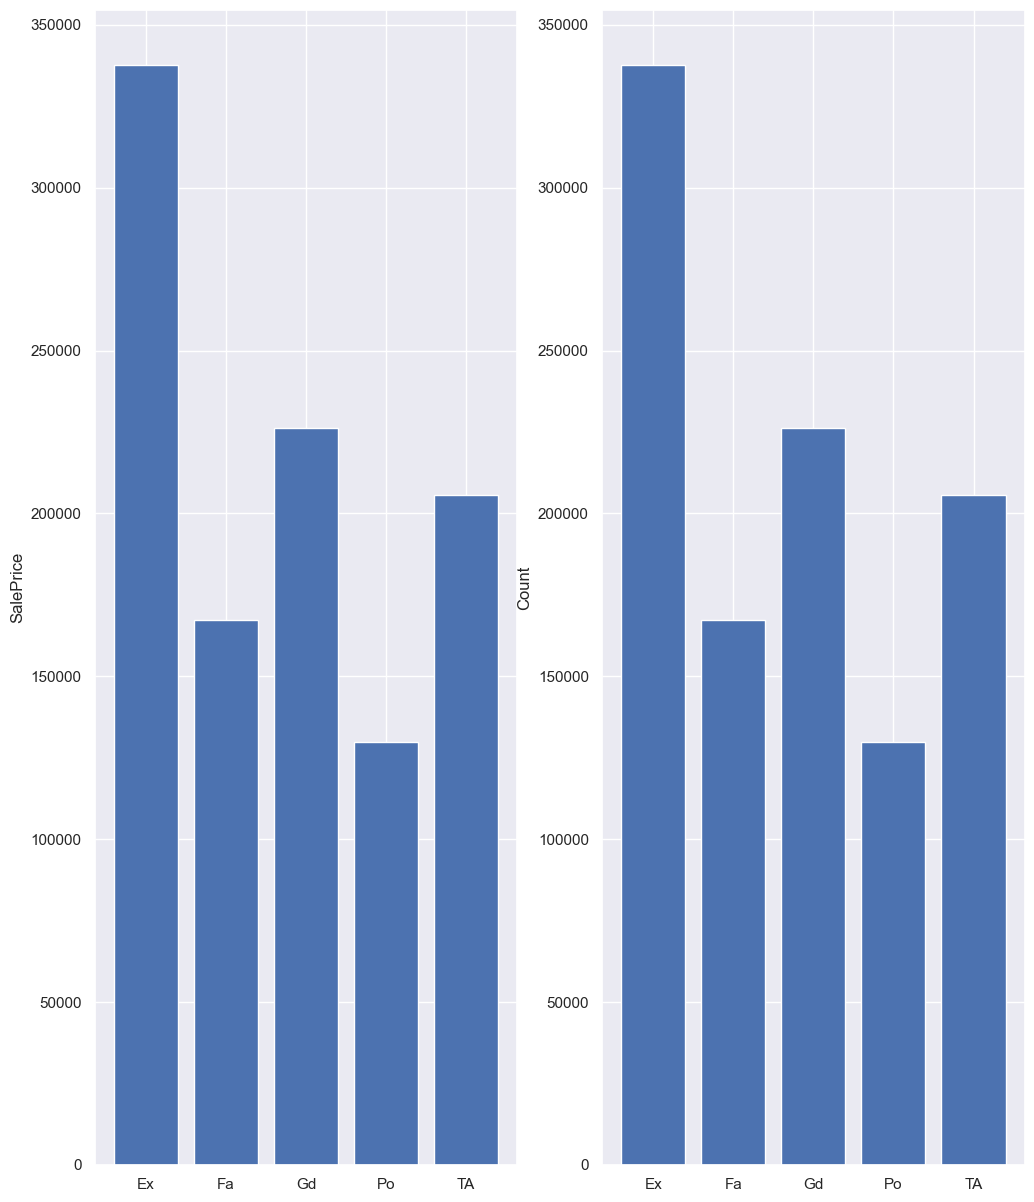

Processing Exterior2nd: Exterior covering on house (if more than one material)


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


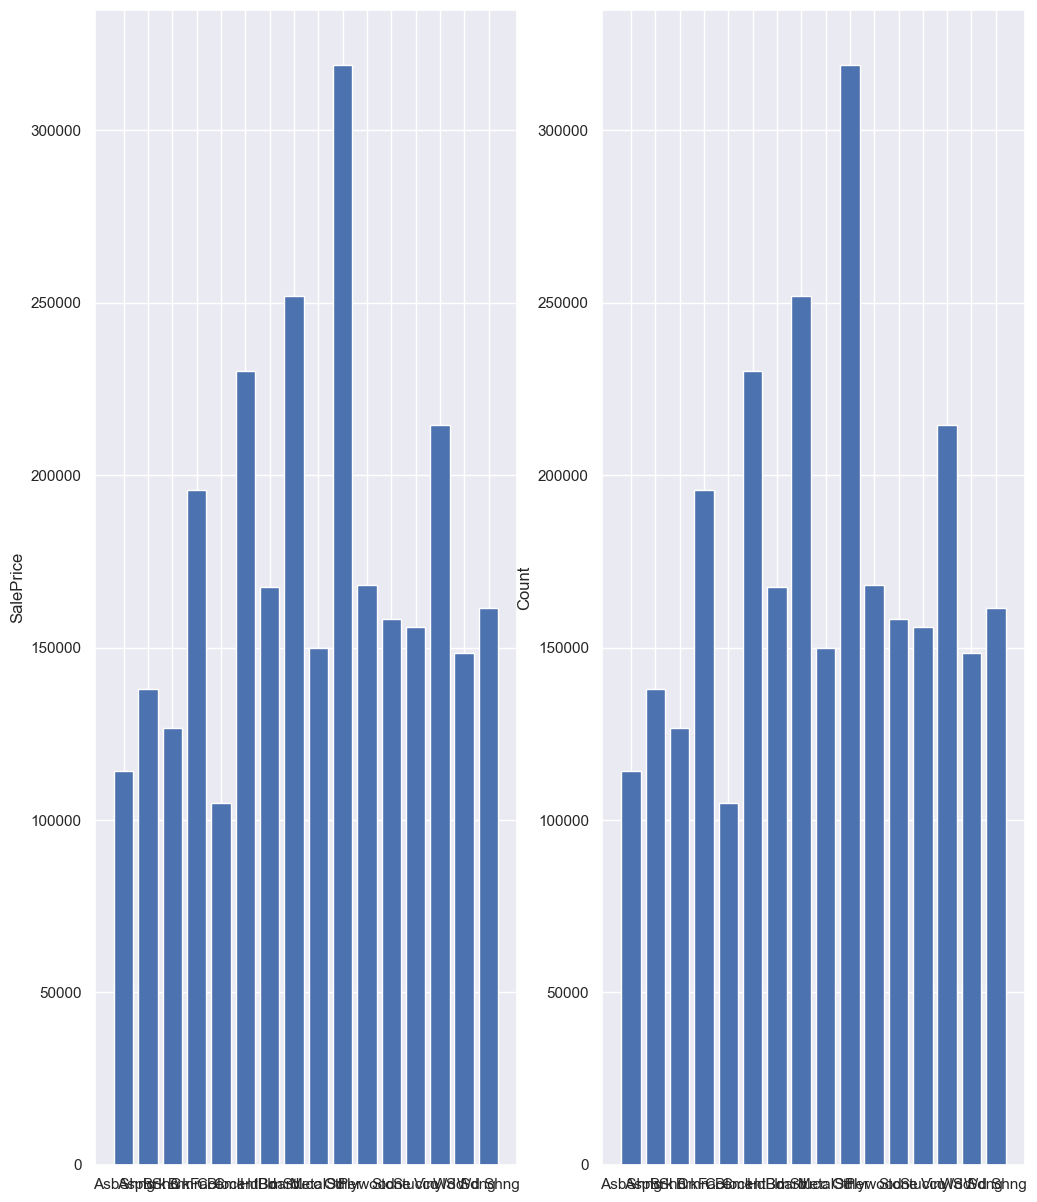

Processing RoofStyle: Type of roof


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


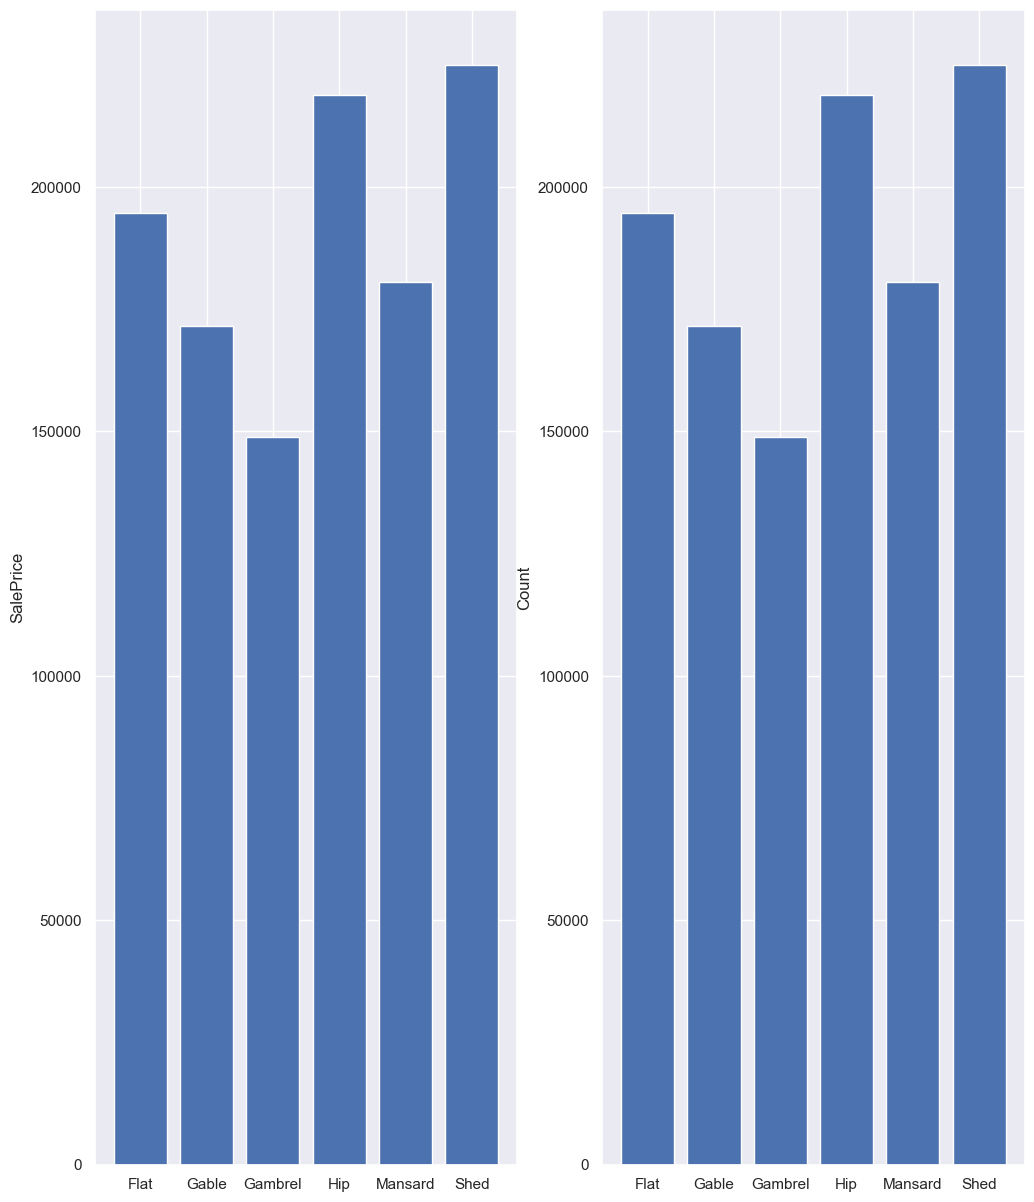

Processing BsmtCond: Evaluates the general condition of the basement


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


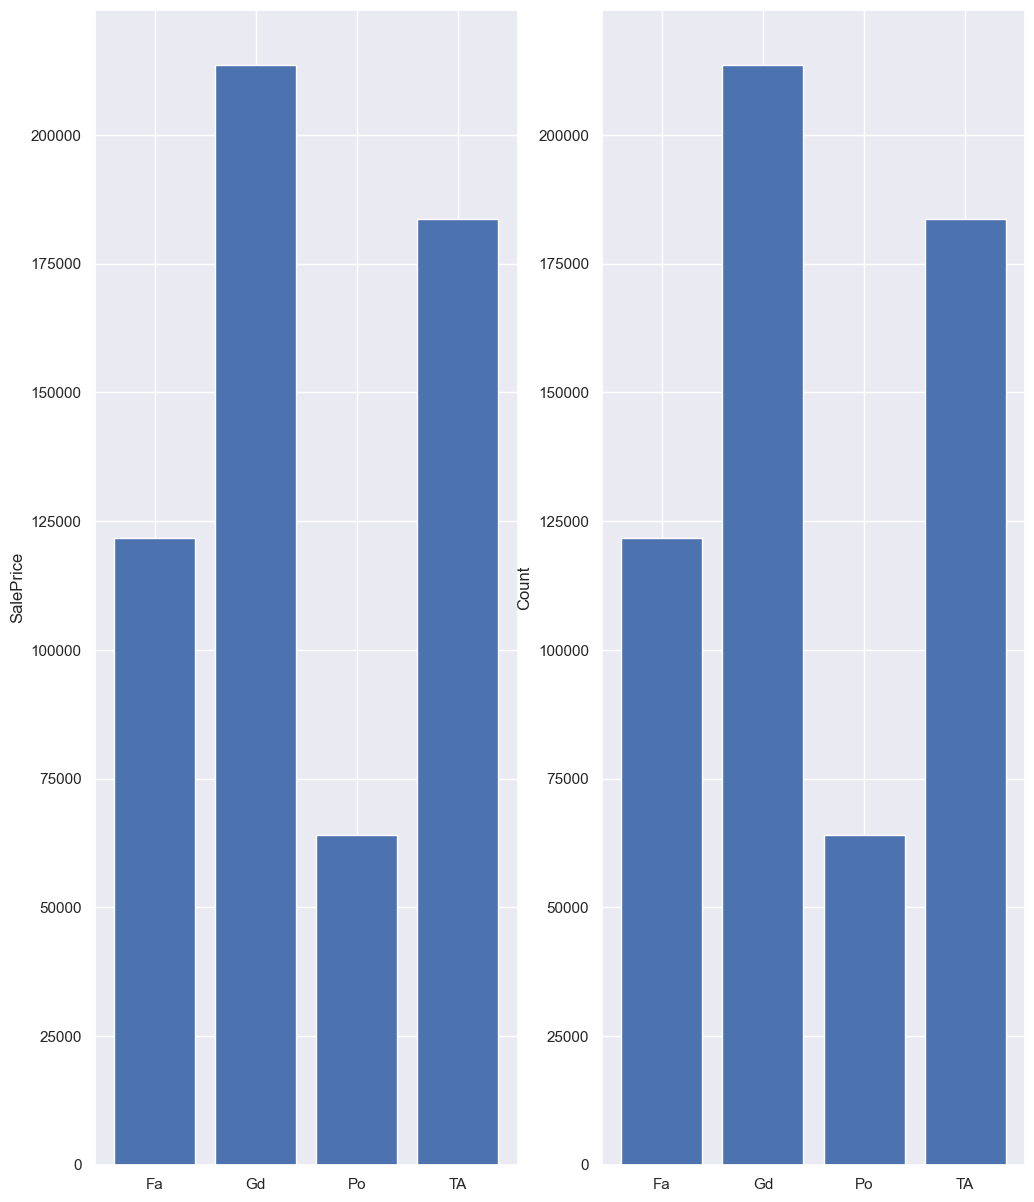

Processing SaleType: Type of sale


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


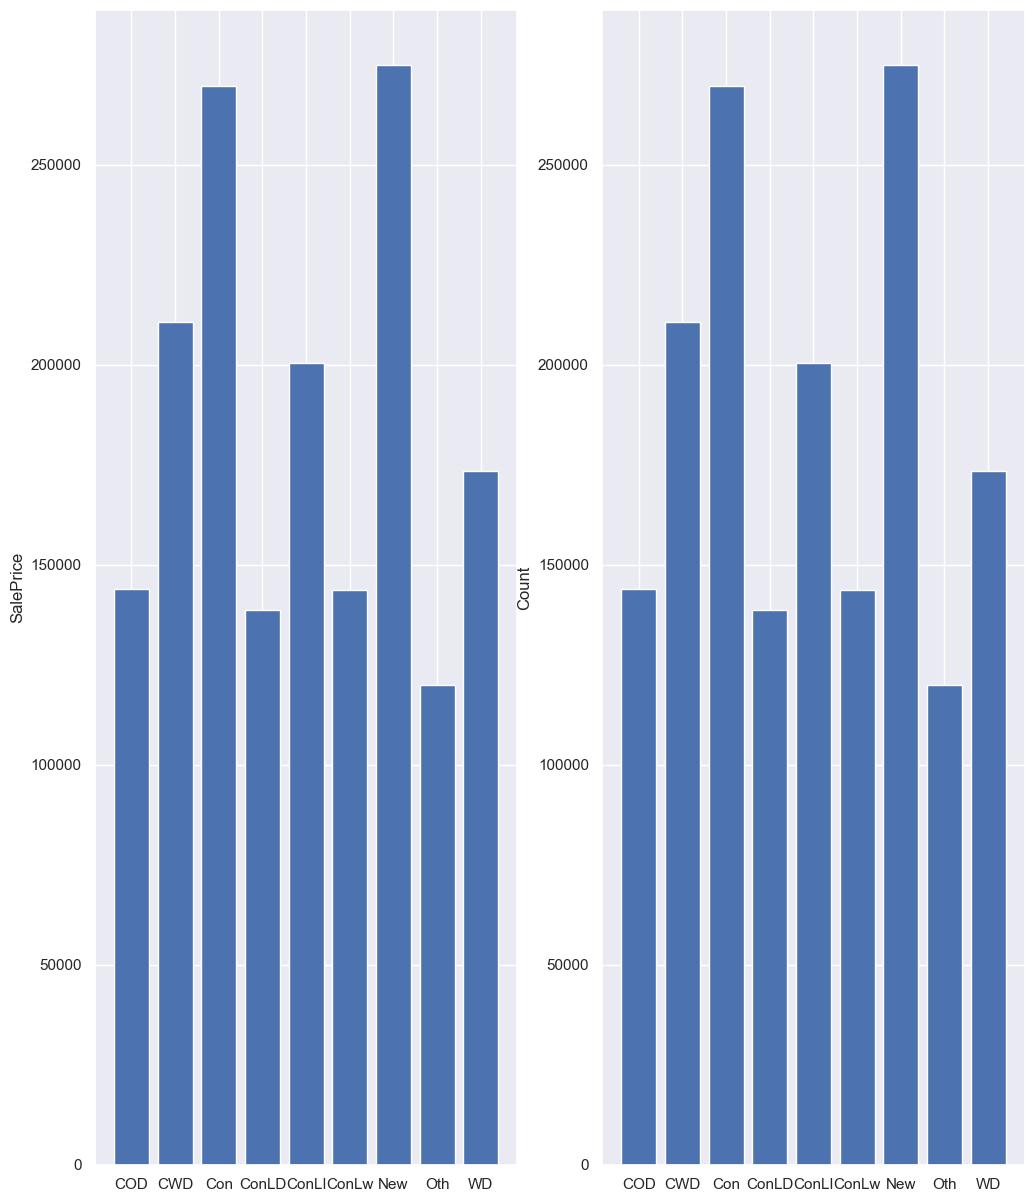

Processing Heating: Type of heating


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


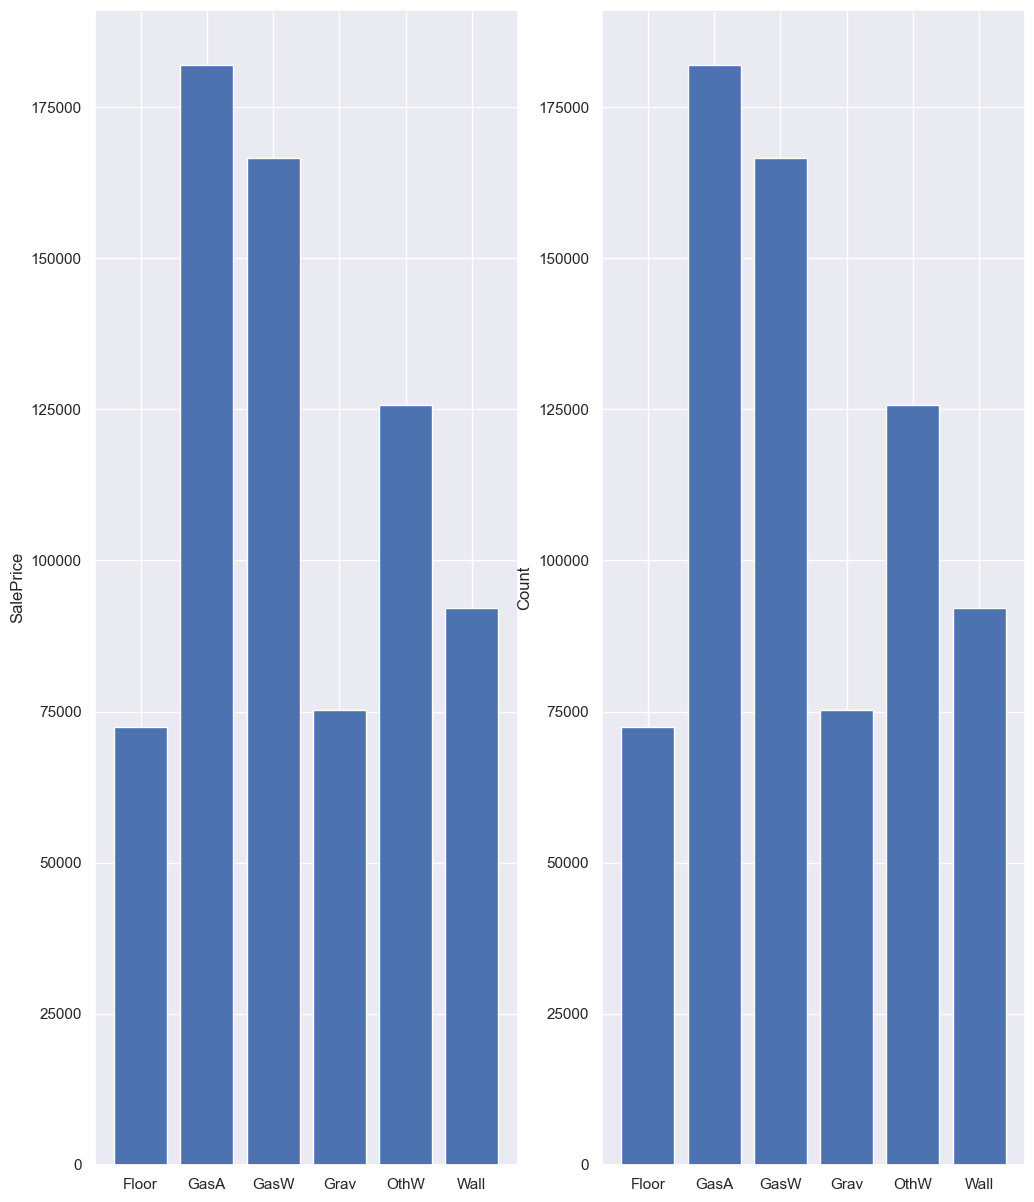

Processing Utilities: Type of utilities available


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


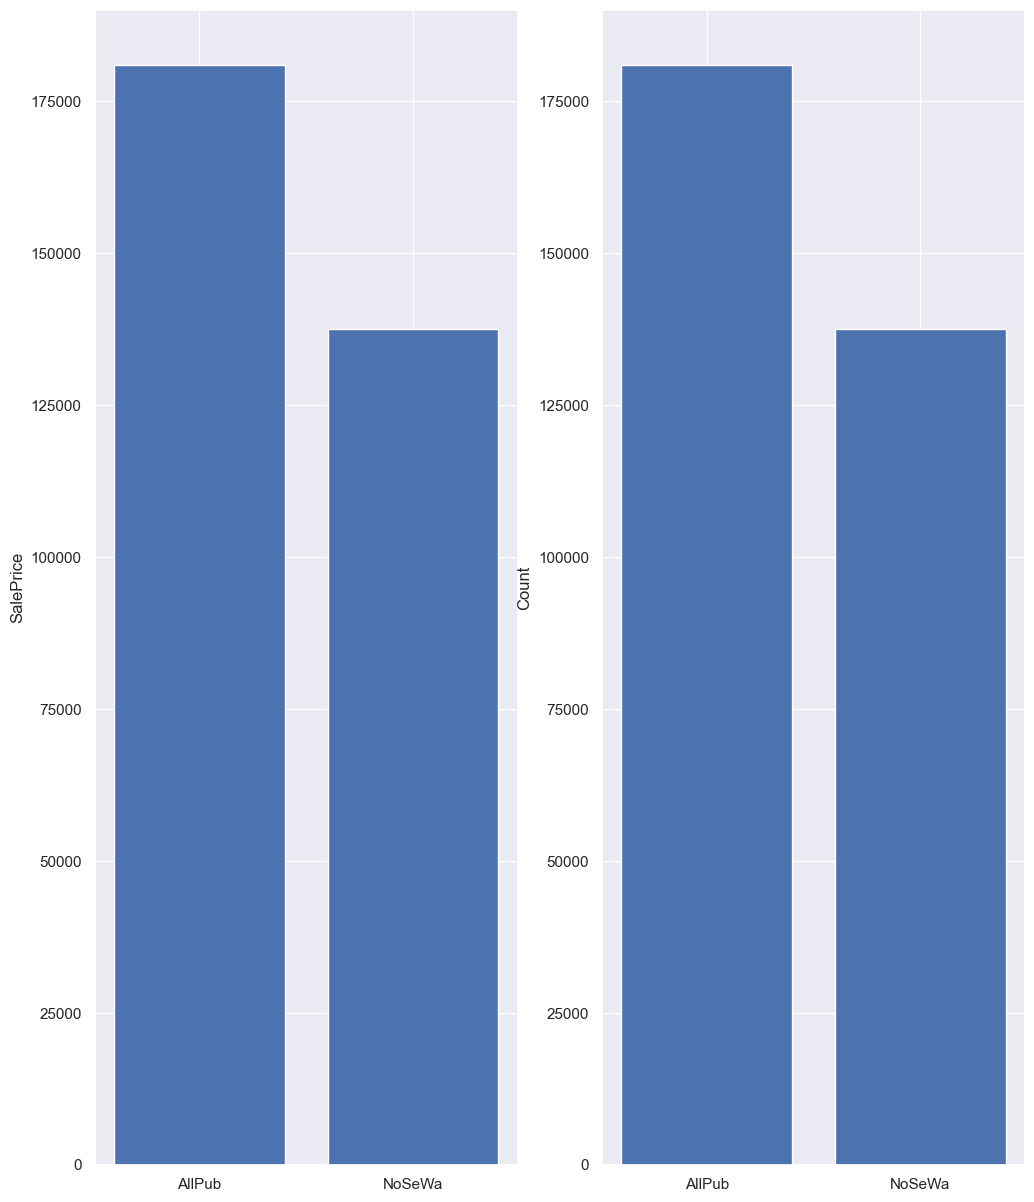

Processing Foundation: Type of foundation


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


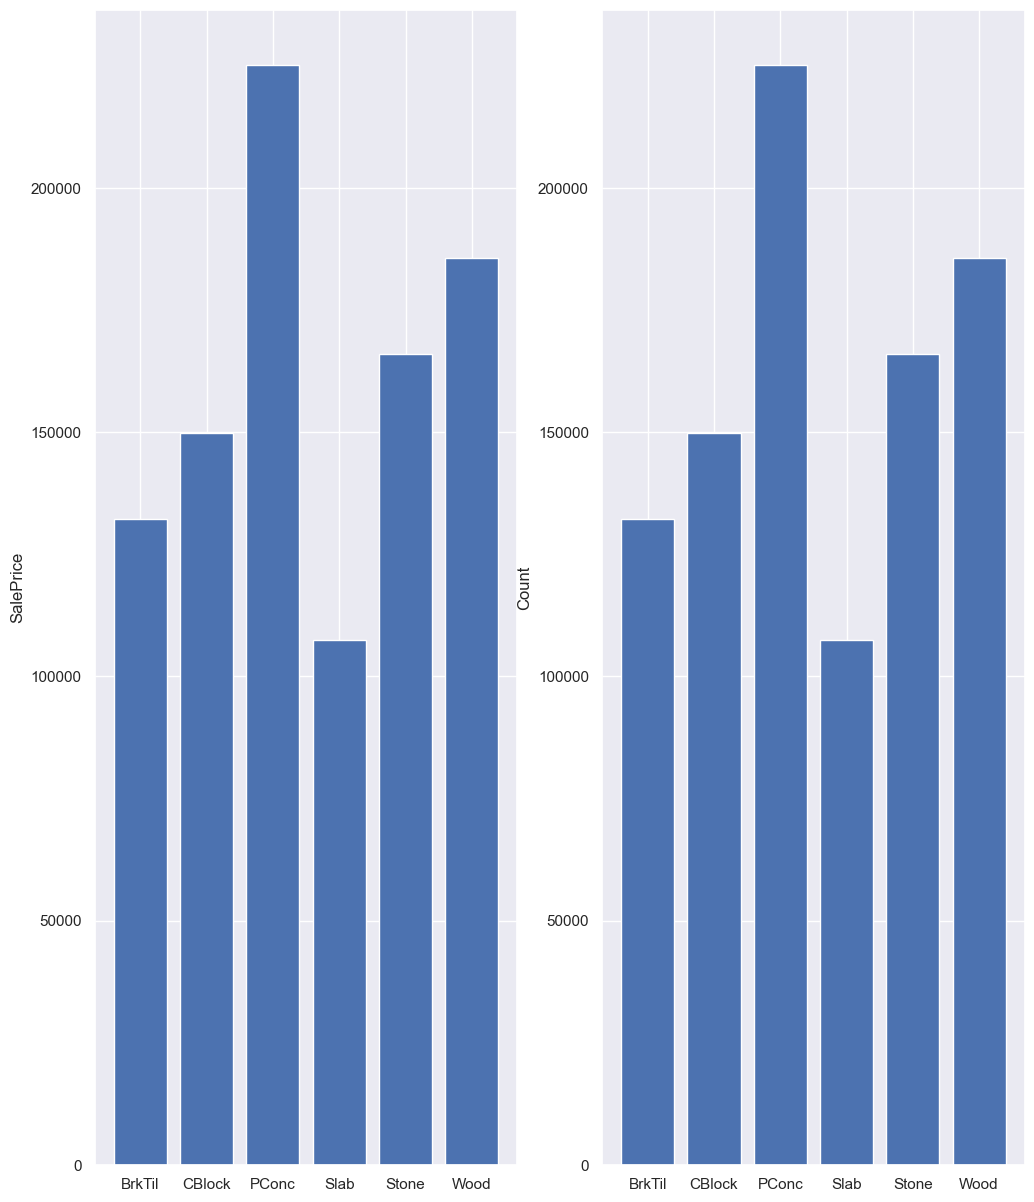

Processing MiscFeature: Miscellaneous feature not covered in other categories


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


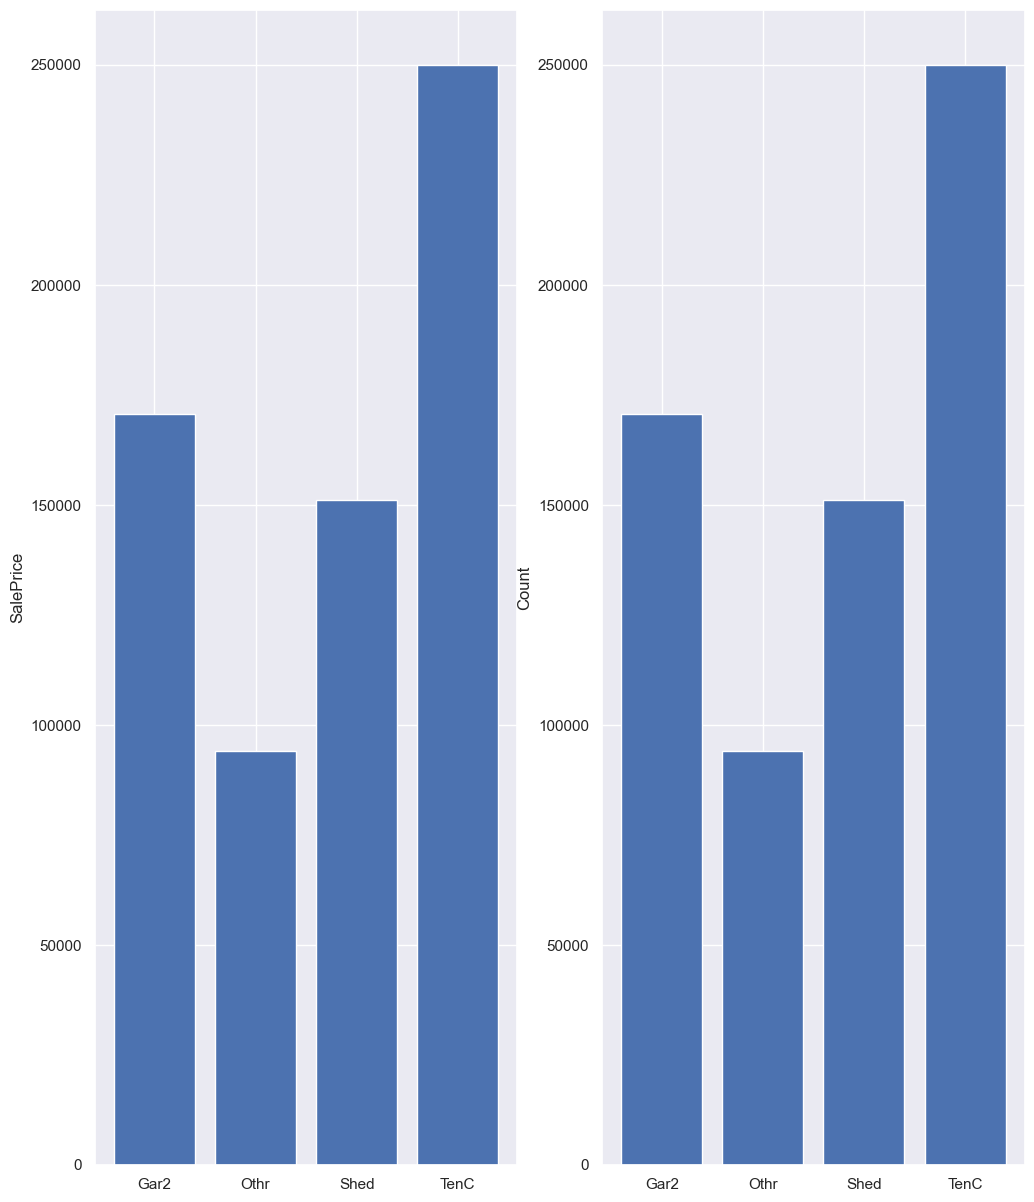

Processing Condition1: Proximity to various conditions


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


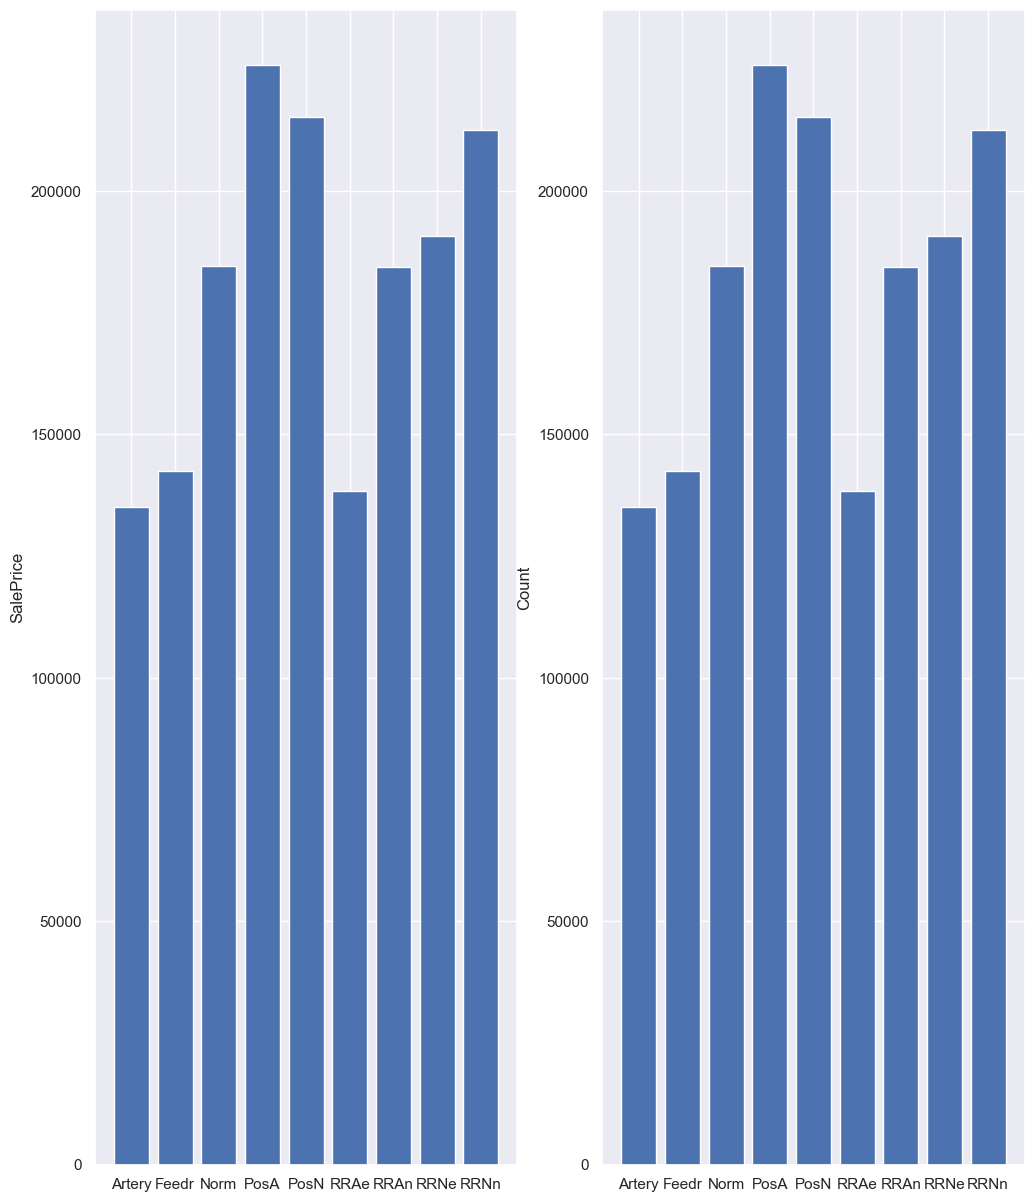

Processing RoofMatl: Roof material


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


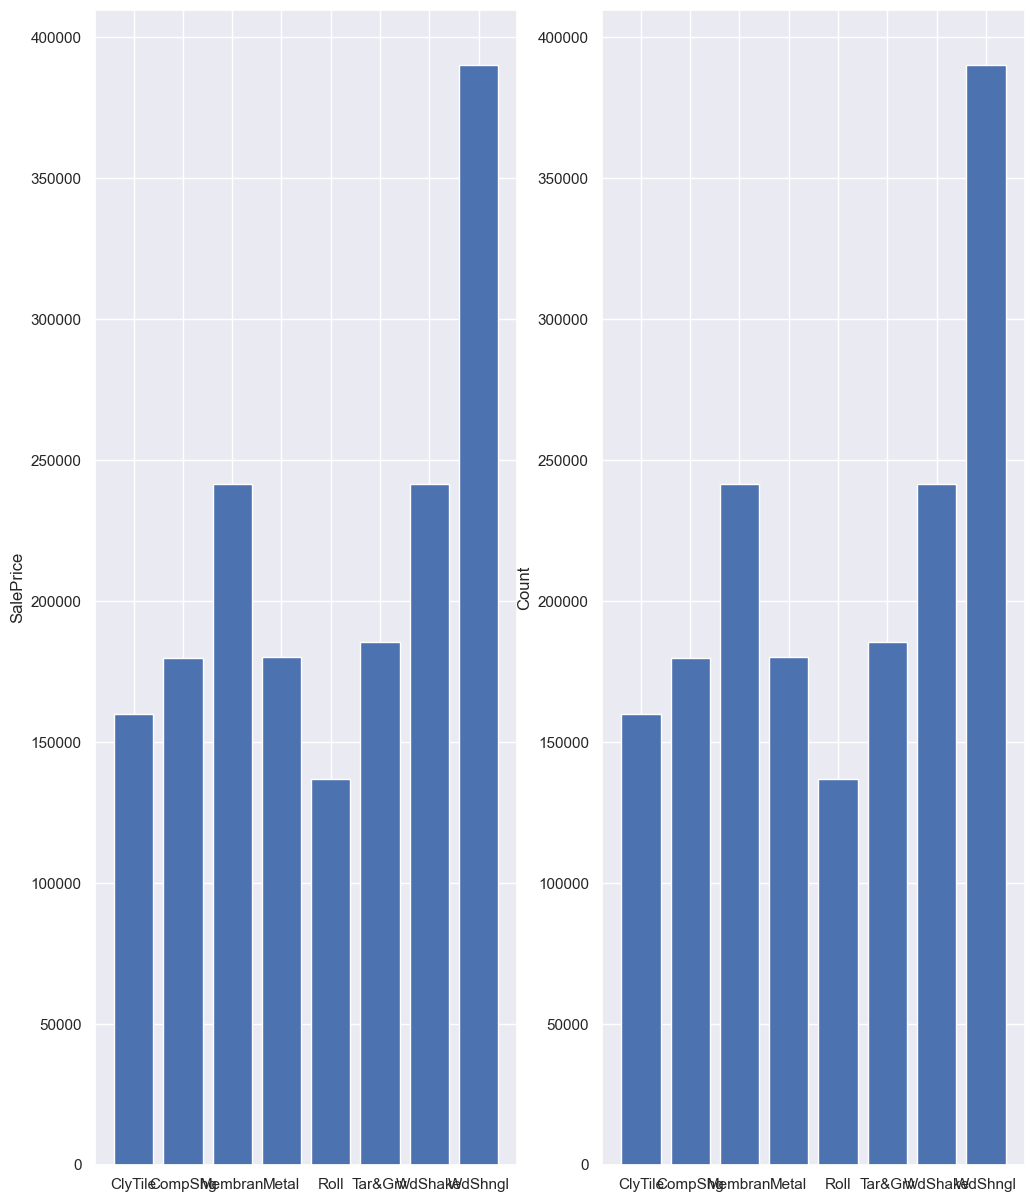

Processing SaleCondition: Condition of sale


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


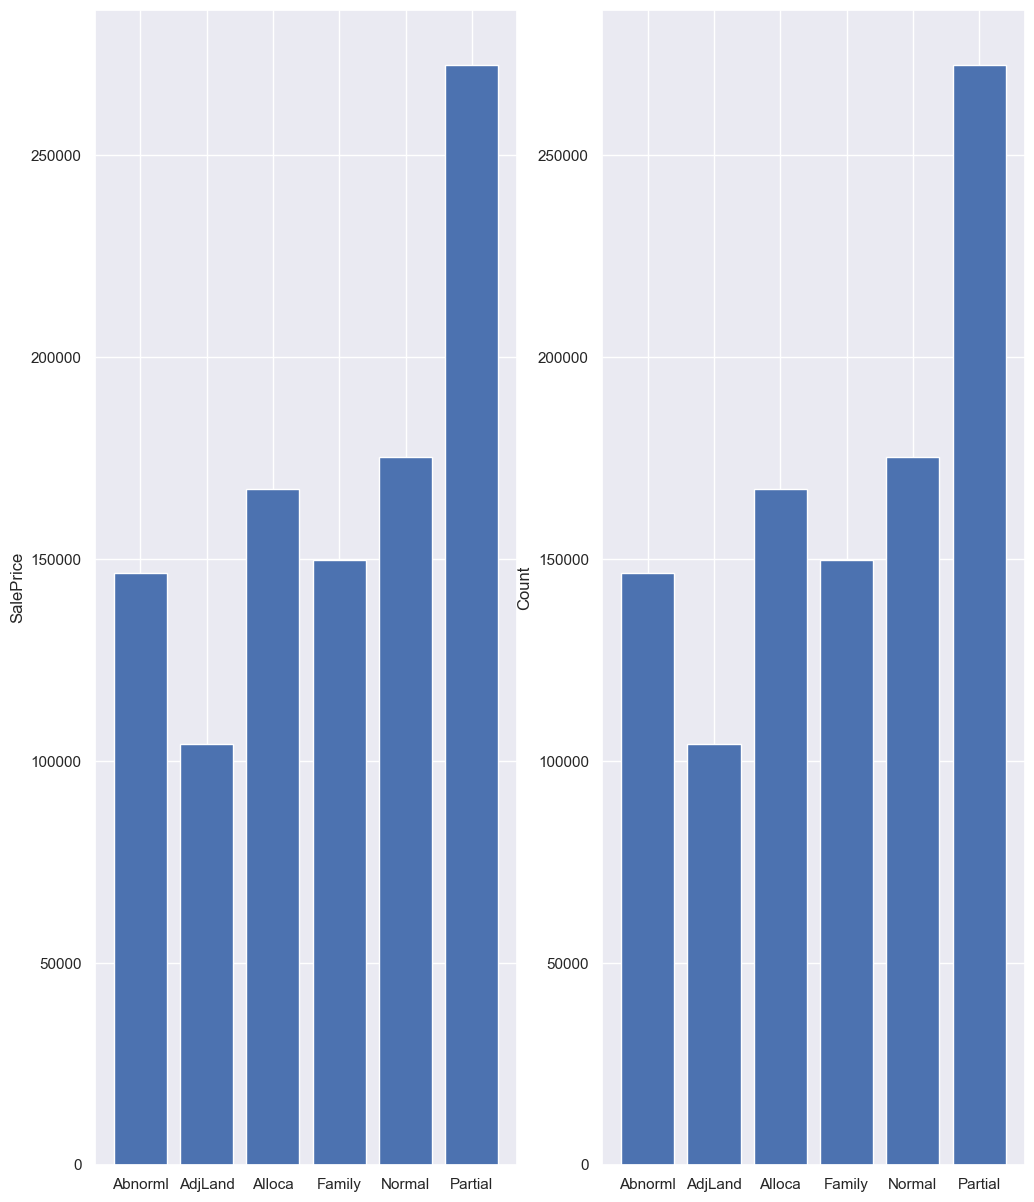

Processing Functional: Home functionality (Assume typical unless deductions are warranted)


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


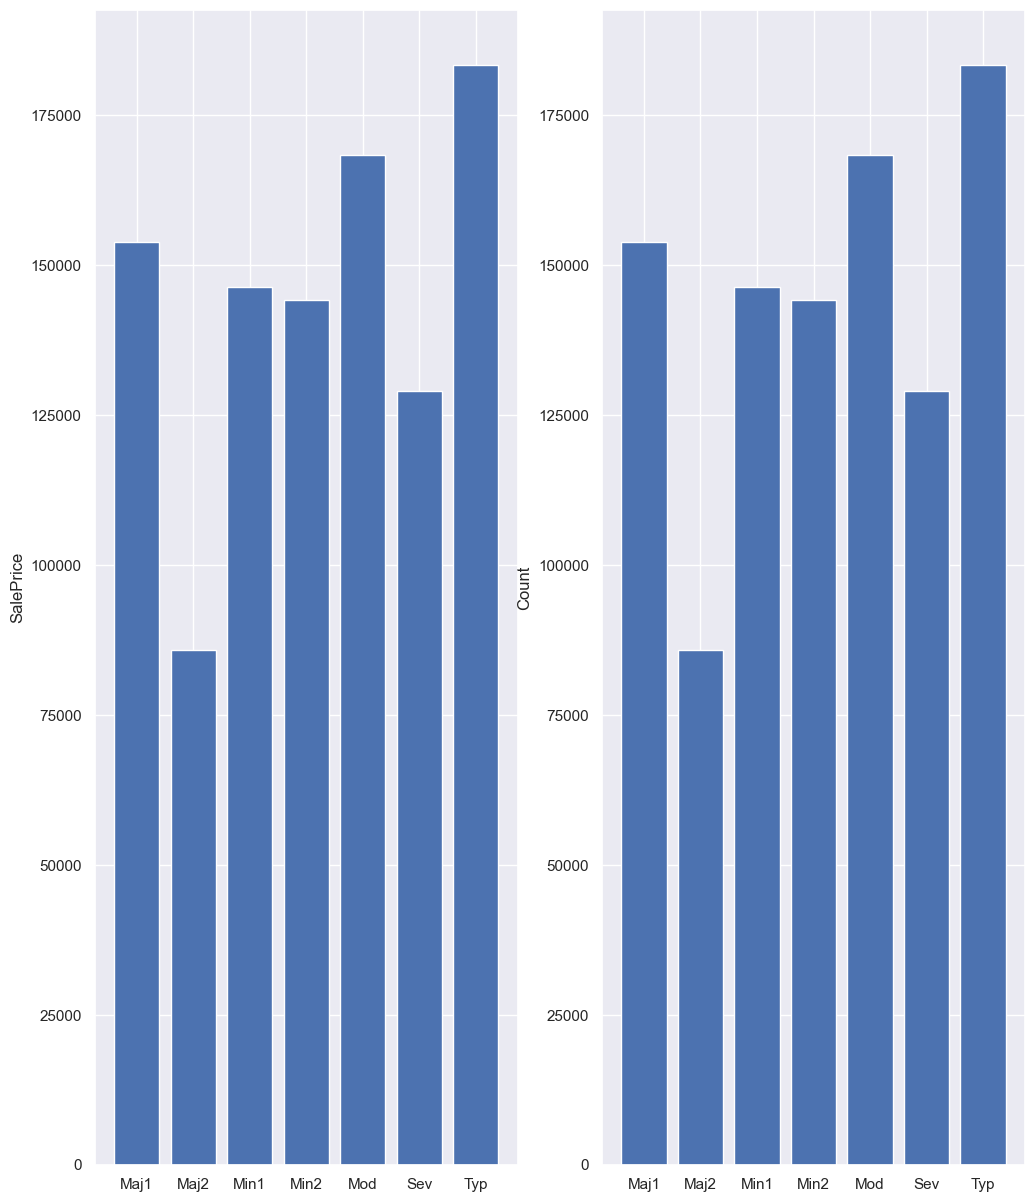

Processing GarageQual: Garage quality


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


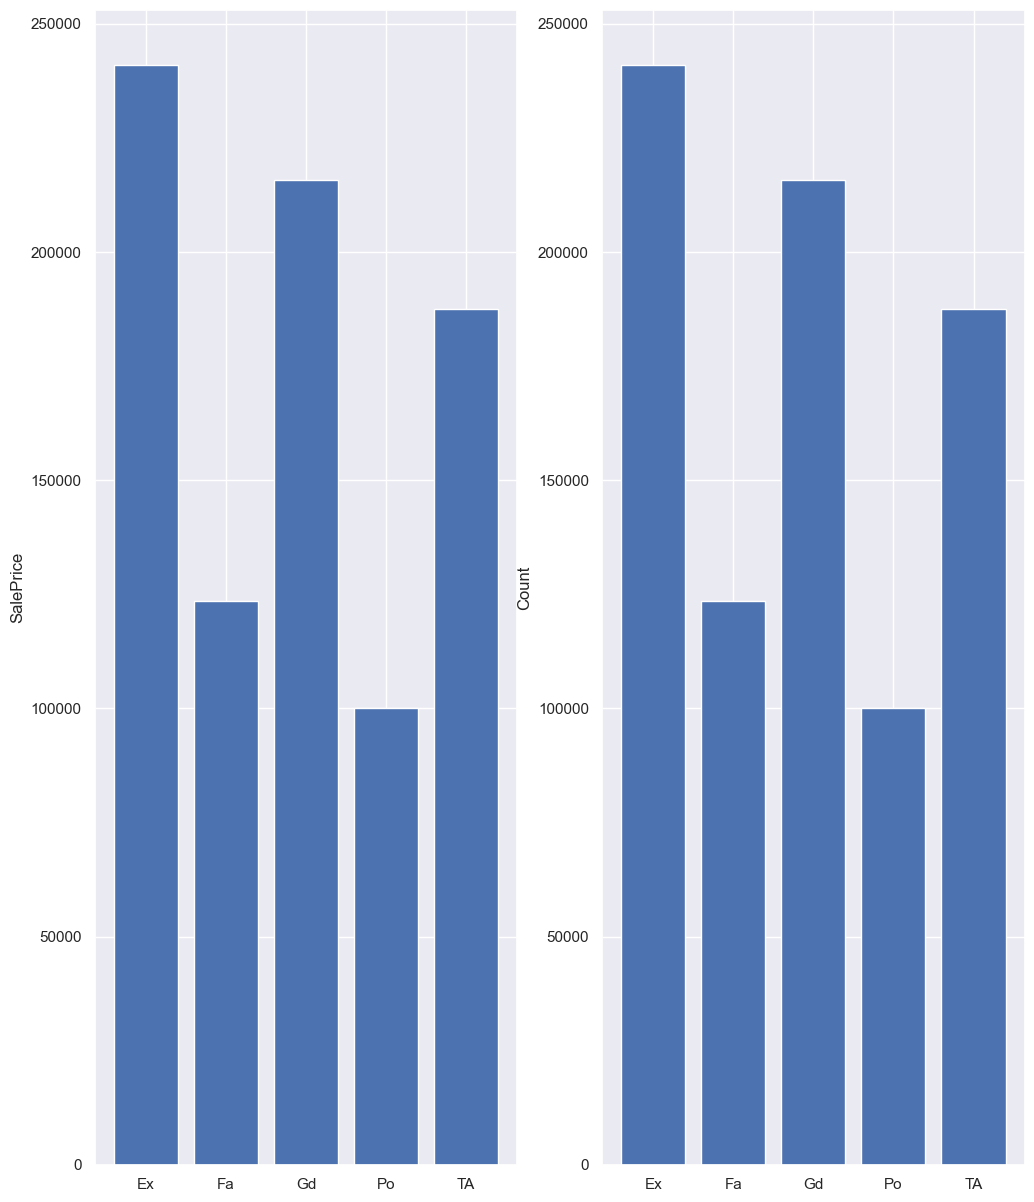

Processing Street: Type of road access to property


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


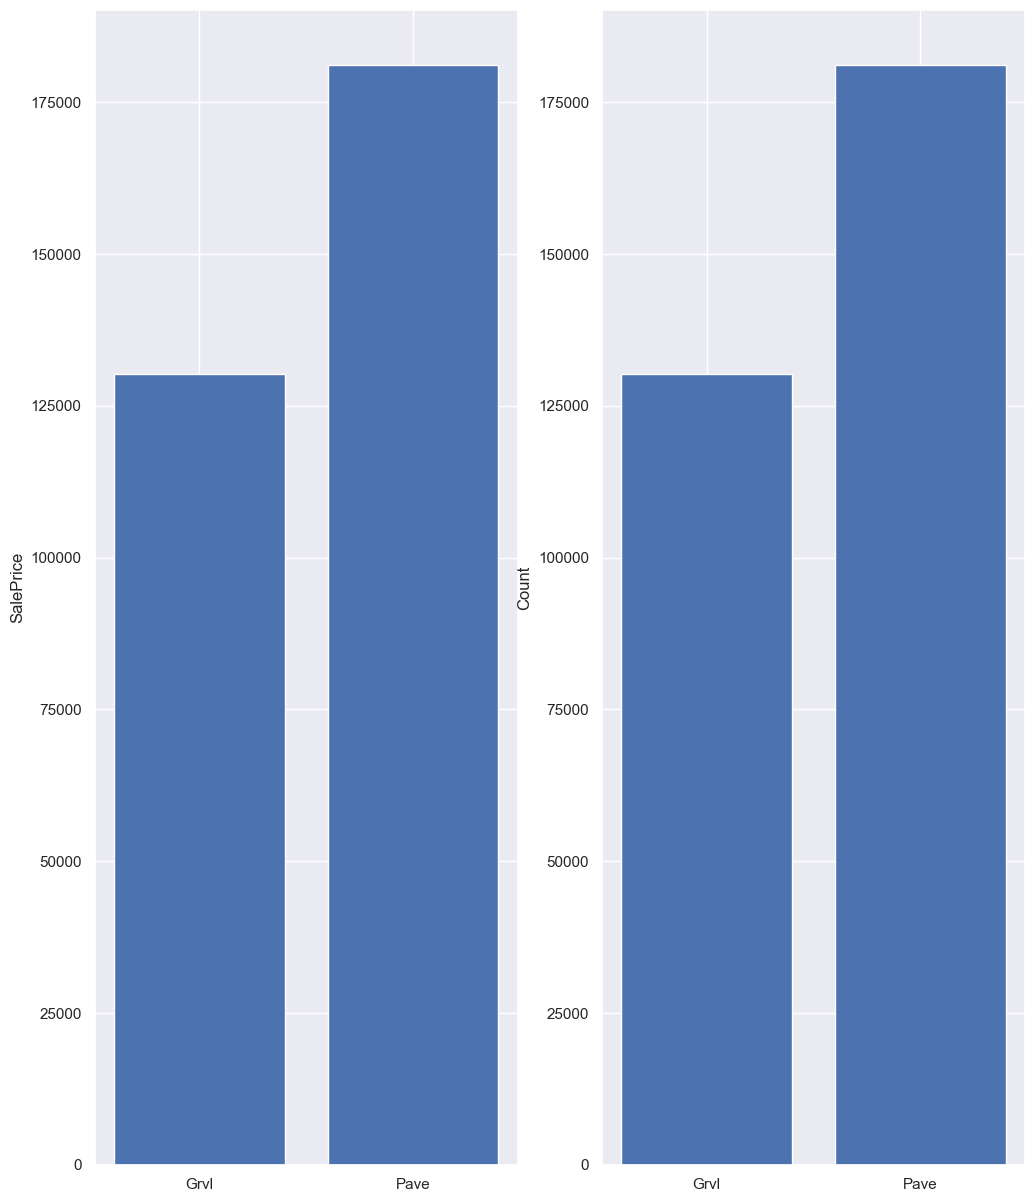

Processing CentralAir: Central air conditioning


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


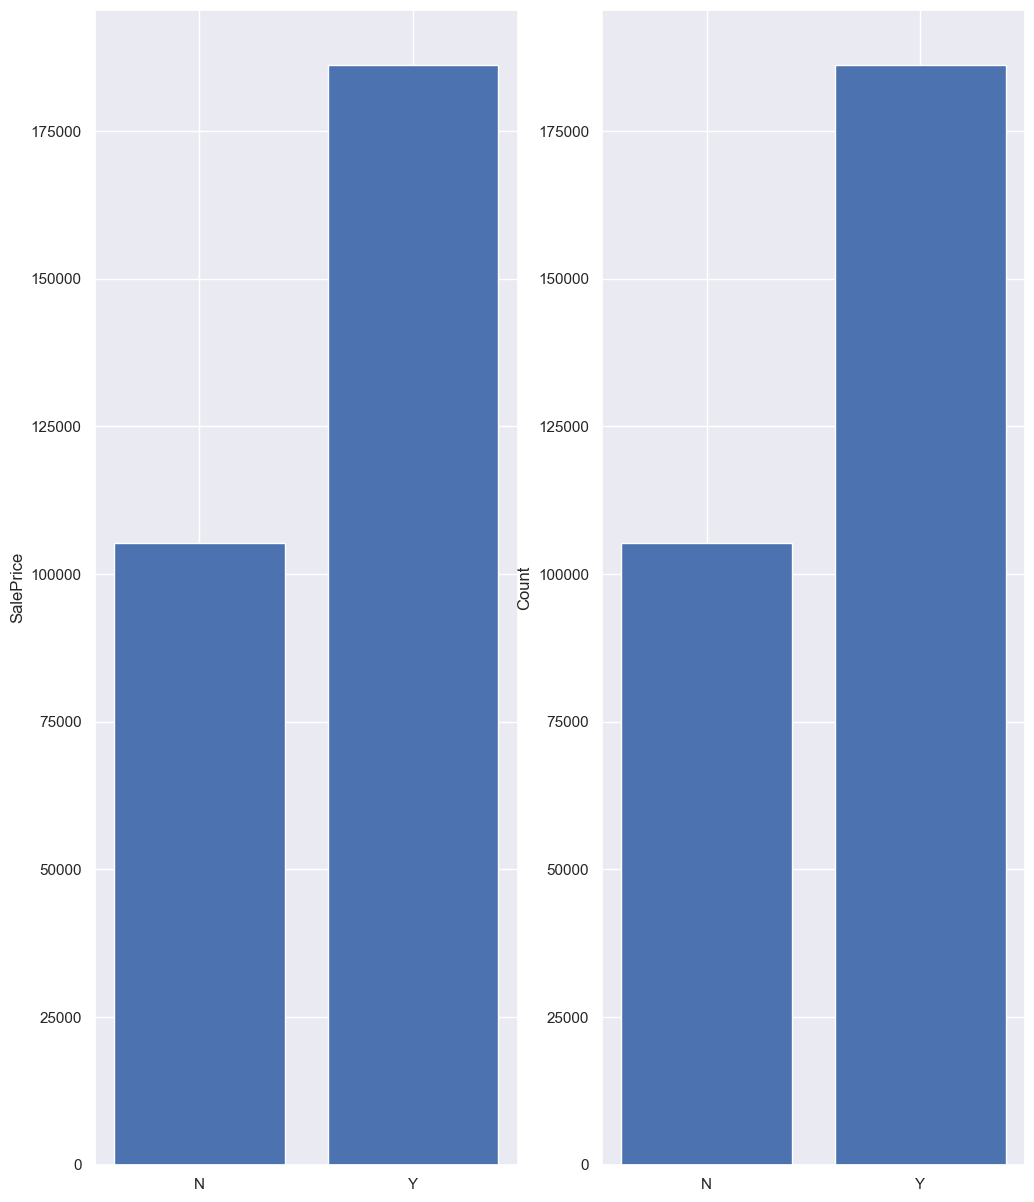

Processing MSZoning: Identifies the general zoning classification of the sale.


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


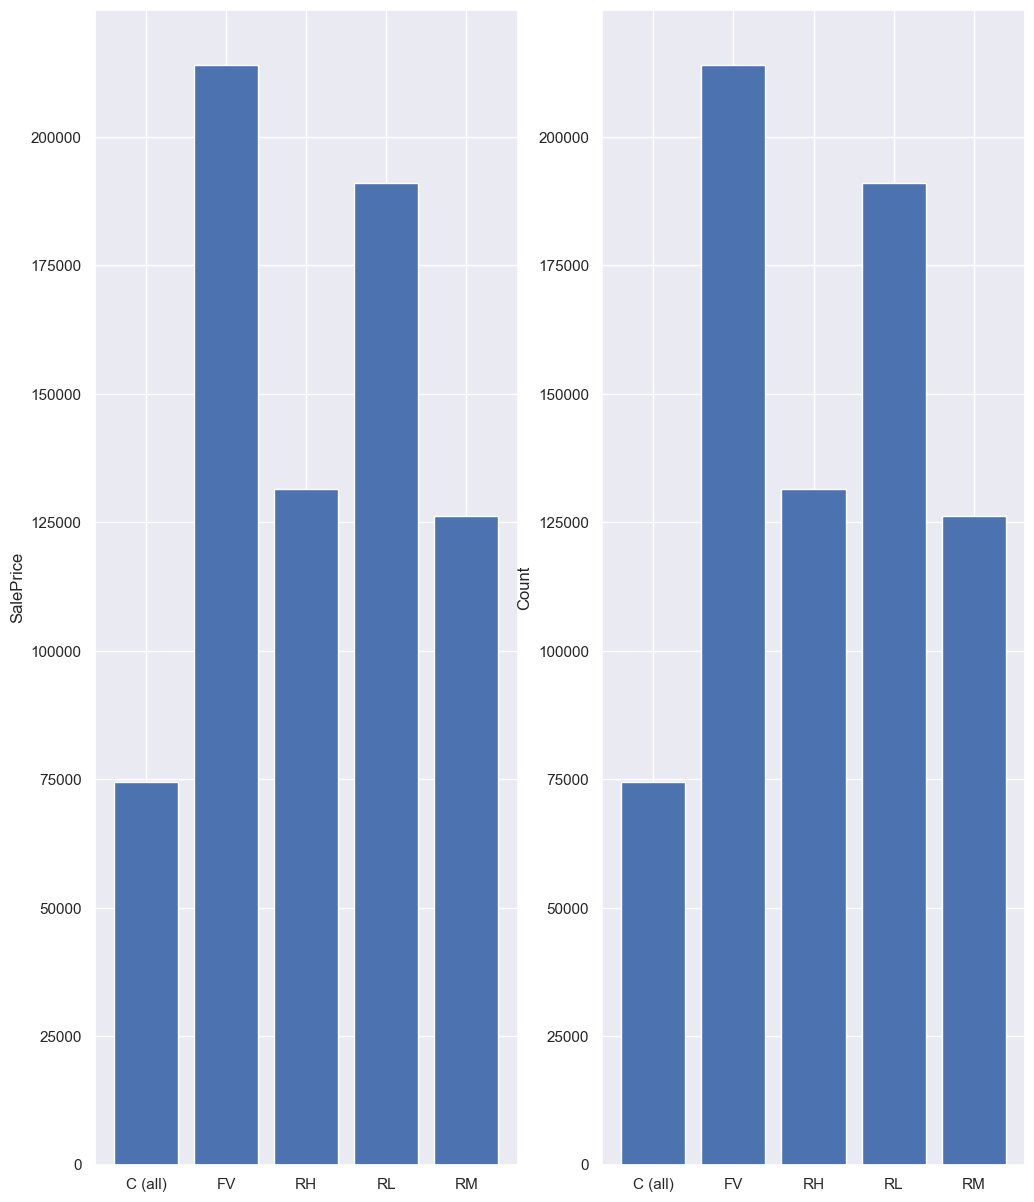

Processing GarageCond: Garage condition


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


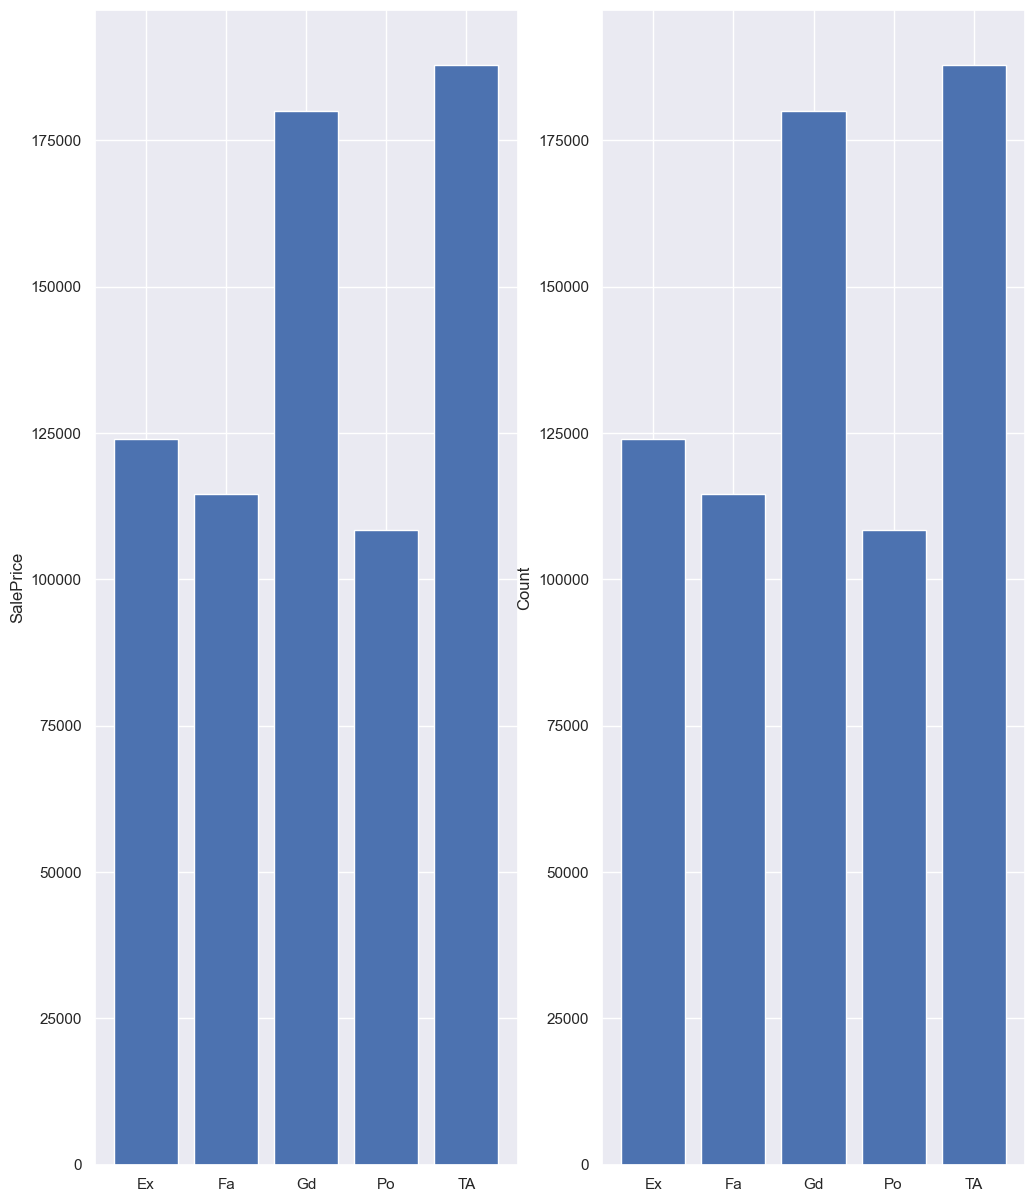

Processing GarageFinish: Interior finish of the garage


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


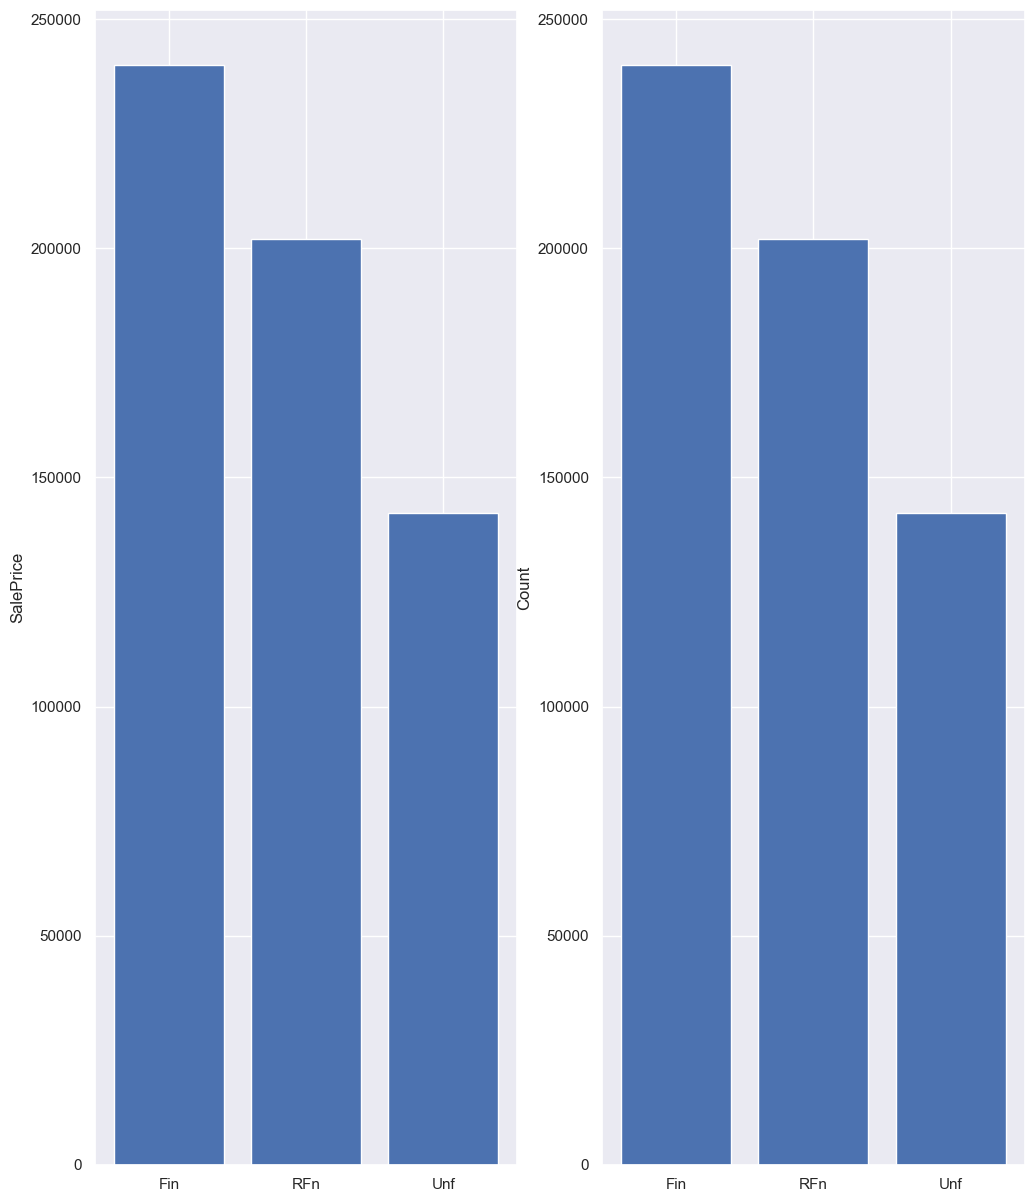

Processing BsmtQual: Evaluates the height of the basement


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


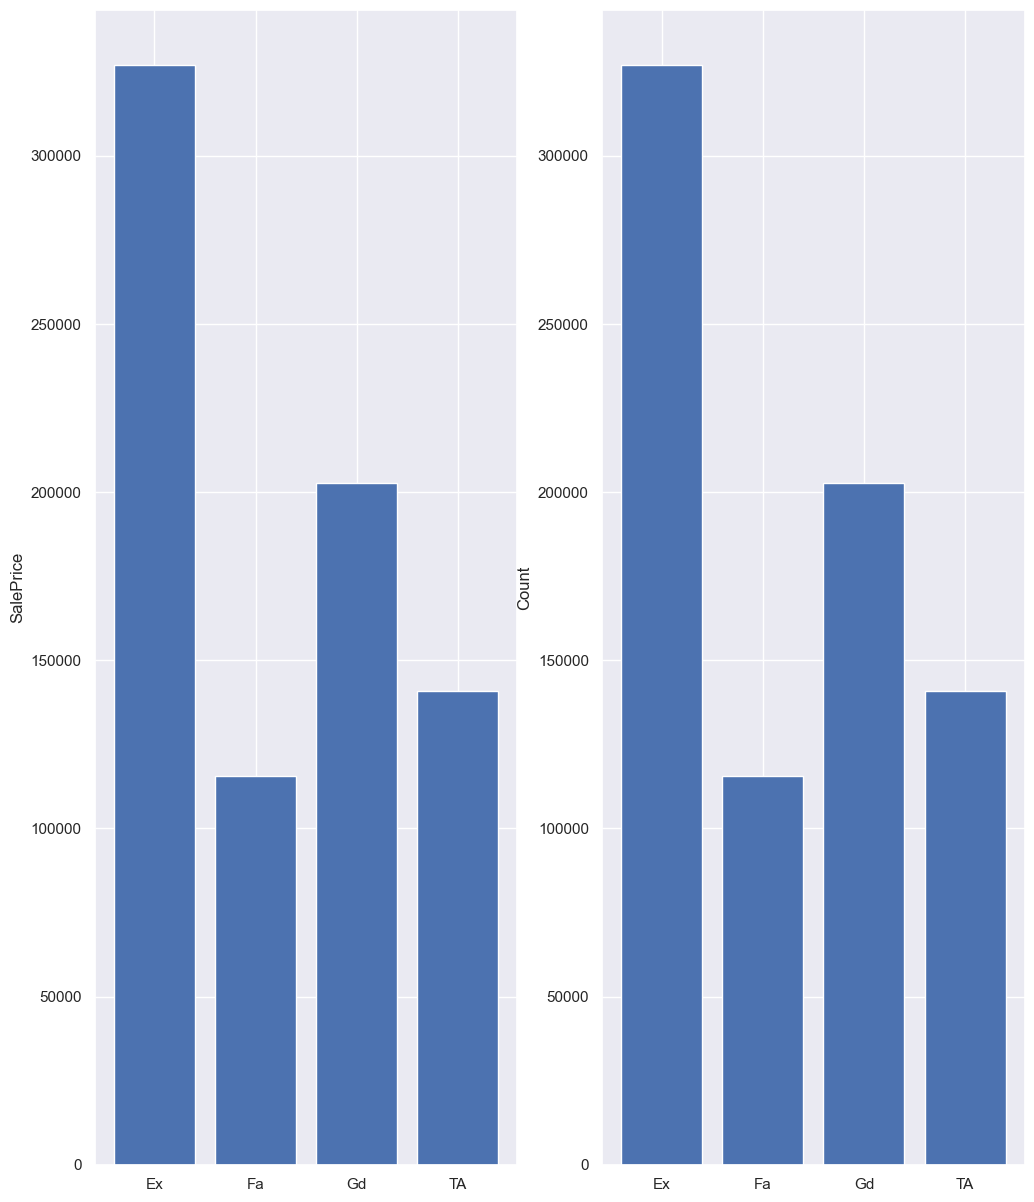

Processing LotShape: General shape of property


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


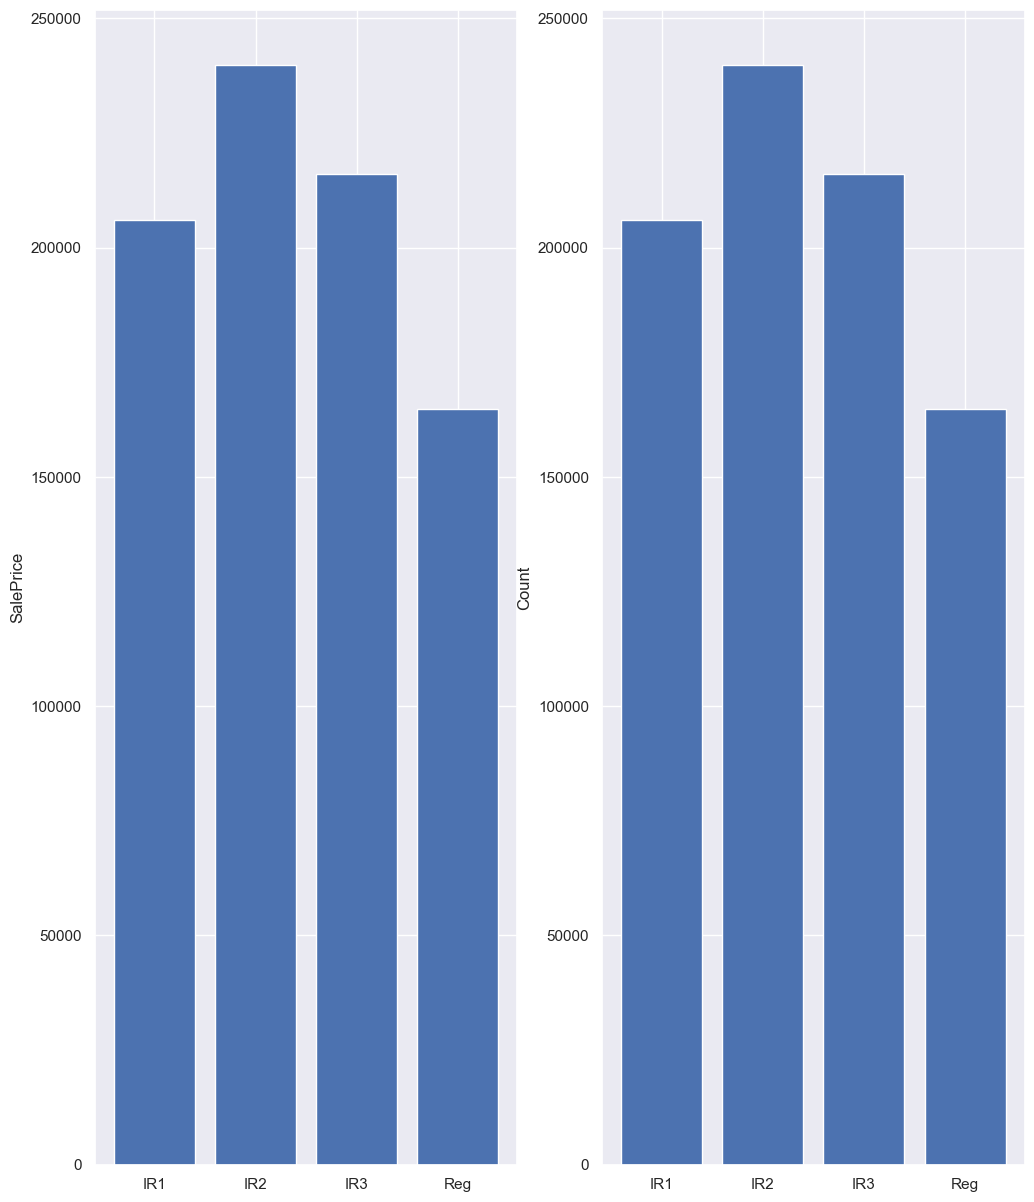

Processing HouseStyle: Style of dwelling


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


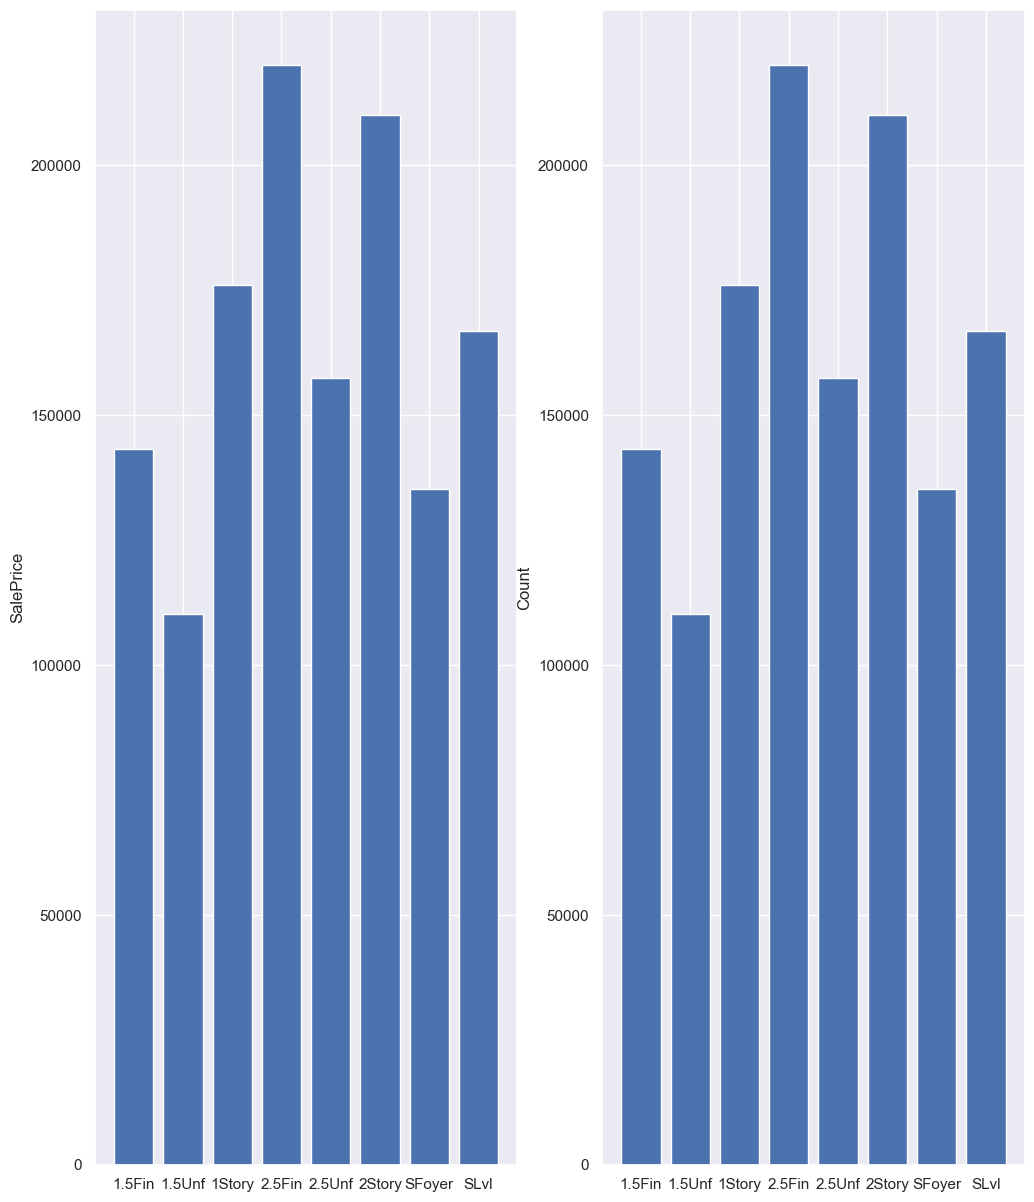

Processing Fence: Fence quality


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


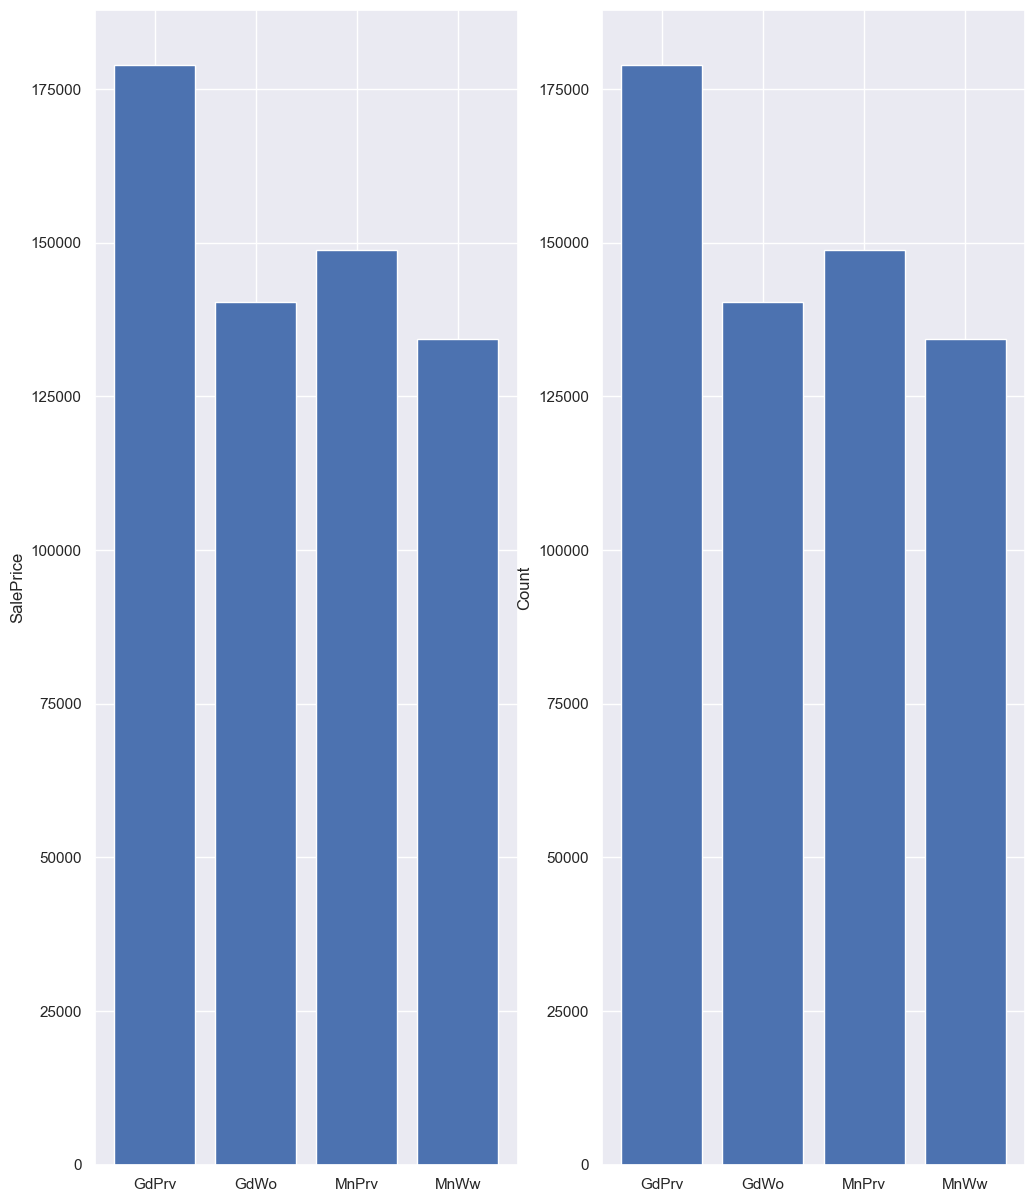

Processing Exterior1st: Exterior covering on house


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


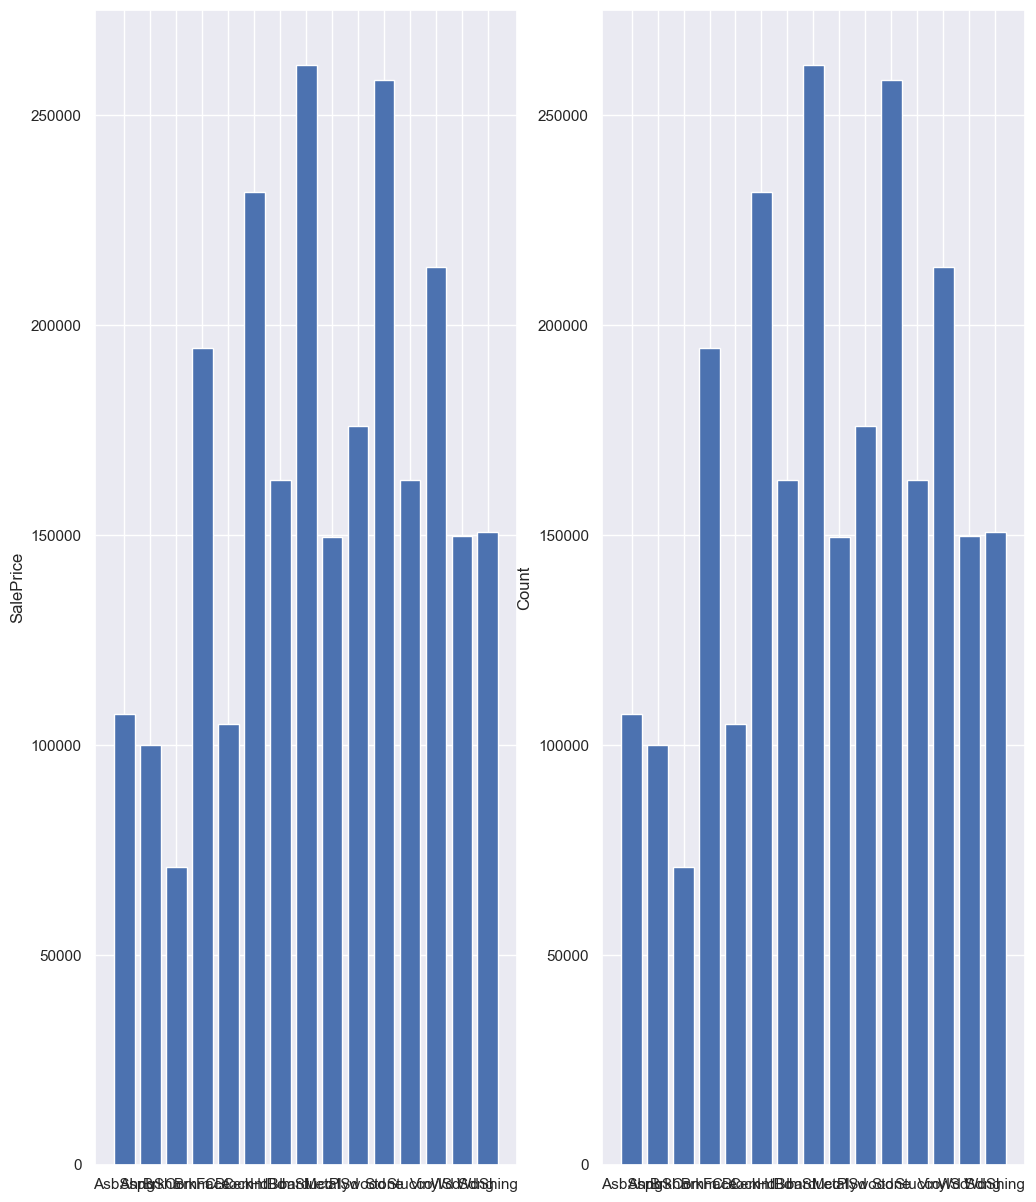

Processing KitchenQual: Kitchen quality


/var/folders/t6/6tp8l7wn3658m2zfgh80_v6h0000gn/T/ipykernel_53584/3925359180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_df = df.groupby(col).mean()["SalePrice"].reset_index()


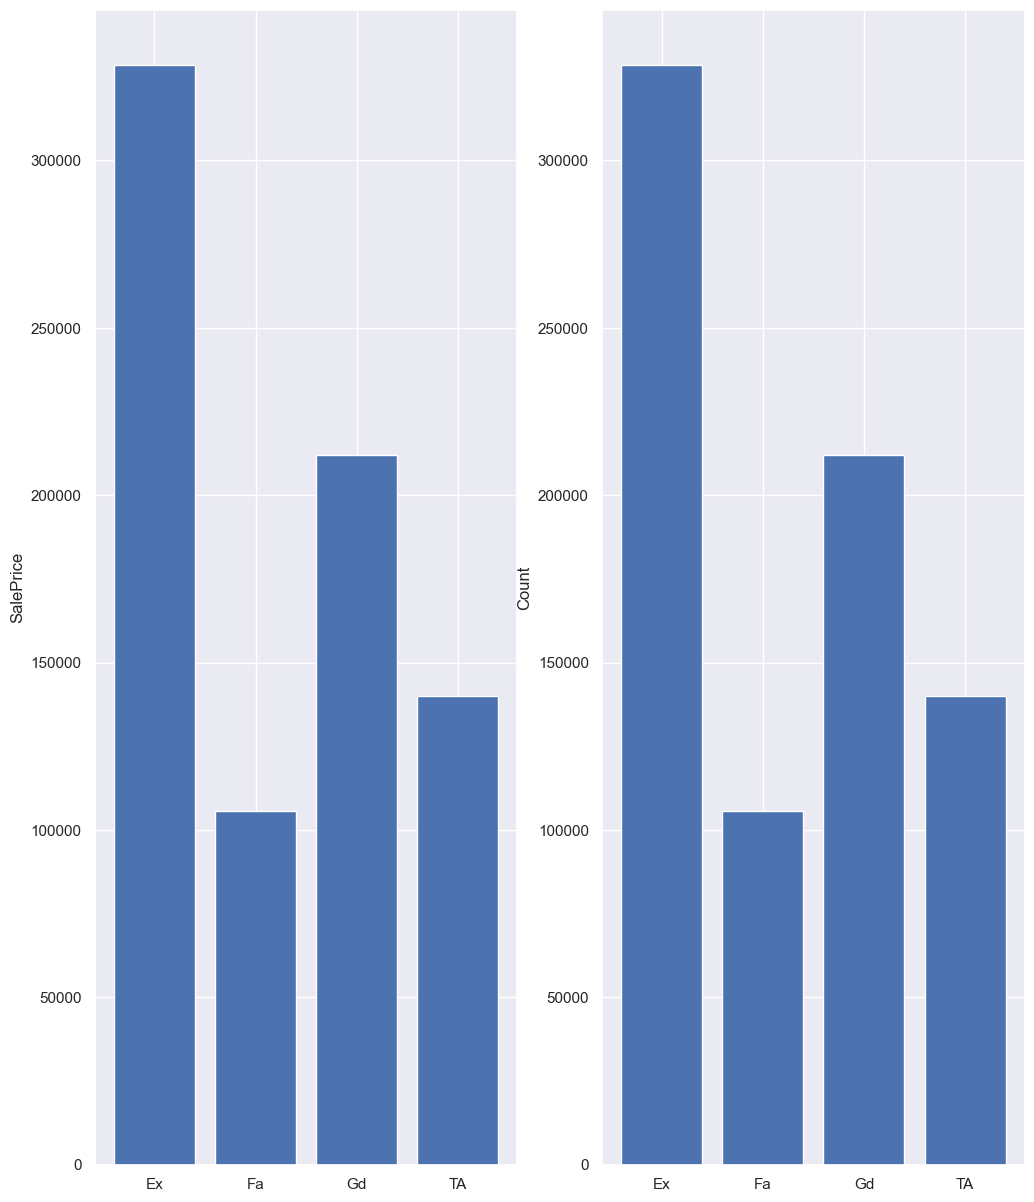

In [63]:
for col in cat_cols:
    print(f"Processing {col}: {descriptions.loc[descriptions['Column'] == col]['Description'].iloc[0]}")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 15))

    col_df = df.groupby(col).mean()["SalePrice"].reset_index()

    ax1.bar(col_df[col], col_df['SalePrice'])
    ax1.set_xticks(col_df[col], rotation=90)
    ax1.set_ylabel("SalePrice")

    col_count = df.groupby(col).count()["SalePrice"].reset_index()

    ax2.bar(col_count[col], col_df['SalePrice'])
    ax2.set_xticks(col_df[col], rotation=90)
    ax2.set_ylabel("Count")

    plt.show()

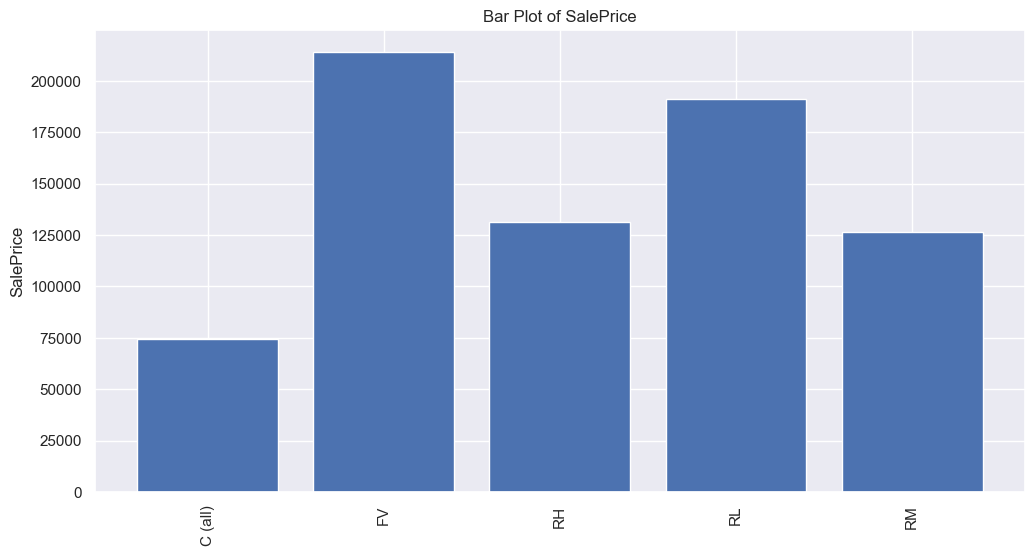

In [31]:
mszone_df = df.groupby('MSZoning')['SalePrice'].mean().reset_index()

utils.plot_bars(mszone_df['MSZoning'], mszone_df['SalePrice'], "SalePrice")

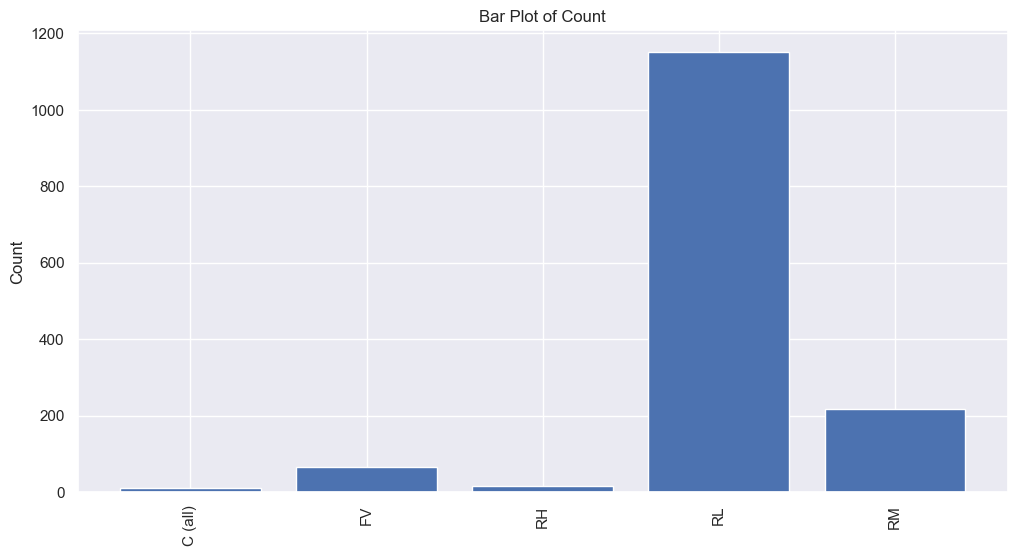

In [34]:
mszone_df = df.groupby('MSZoning')['SalePrice'].count().reset_index()

utils.plot_bars(mszone_df['MSZoning'], mszone_df['SalePrice'], "Count")

## 2023-11-21

Find the categorical variable that gives the highest variance in SalePrice.
- when splitting by this categorical variable, the mean SalePrices for each category has the most variance 

In [114]:
# quick solution

max_var_cat = list(cat_cols)[np.array([(df[list(cat_cols) + ['SalePrice']].groupby(x)['SalePrice'].mean()).std() for x in list(cat_cols)]).argmax()]
print(f"Categorical Variable with Maximum Std in SalesPrice: {max_var_cat}")

Categorical Variable with Maximum Std in SalesPrice: PoolQC


In [116]:
# elaborate solution

cat_cols_vars = [(df[list(cat_cols) + ['SalePrice']].groupby(x)['SalePrice'].mean()).std() for x in list(cat_cols)]

cat_cols_vars = pd.DataFrame(cat_cols_vars, index=cat_cols, columns=['SalePrice Std']).sort_values(by=['SalePrice Std'], ascending=False)
cat_cols_vars

,SalePrice Std
PoolQC,162523.090770
ExterQual,121669.389152
KitchenQual,98569.621328
BsmtQual,94368.336203
Condition2,84325.717127
RoofMatl,79783.318754
FireplaceQu,78740.977670
Neighborhood,66725.196972
BsmtCond,66570.541388
MiscFeature,64500.725437


PoolQC group SalePrice variance: $162,523.09


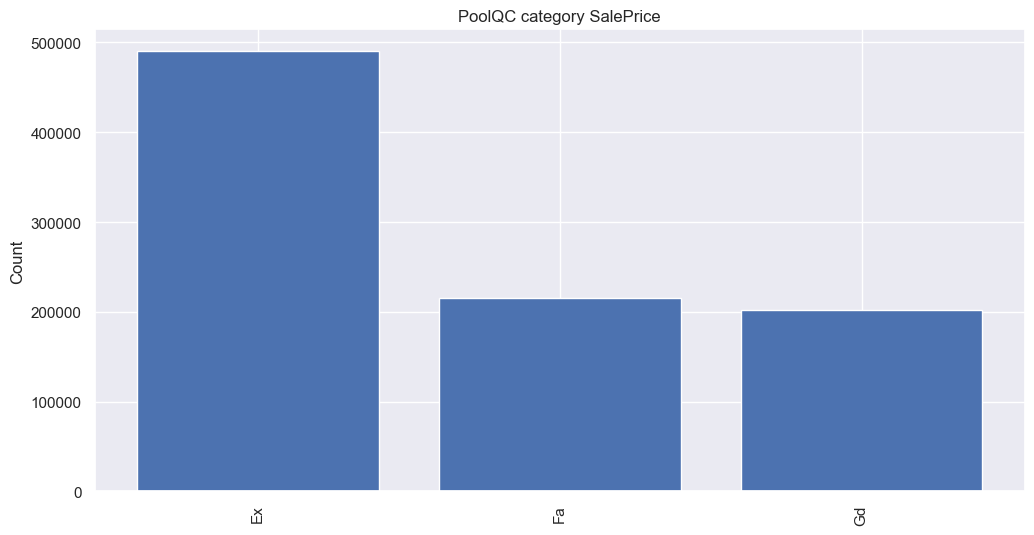

In [120]:
# check solution

col = cat_cols_vars.index[0]

max_var_SP = df.groupby(col)['SalePrice'].mean().reset_index()

print(f"{col} group SalePrice variance: ${cat_cols_vars.loc[col].iloc[0]:,.2f}")

utils.plot_bars(max_var_SP[col], max_var_SP['SalePrice'], 'Count', title=f"{col} category SalePrice")

## 2023-11-22

Given all variables except the `SalePrice`, predict the `SalePrice`, and optimise out-of-sample (OOS) R2